In [9]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [10]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from matplotlib.colors import Normalize

## Import modules from parent and multimode expts

In [11]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Parent Path: c:\_Lib\python\multimode_expts


In [12]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [13]:
from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [14]:
import experiments.fitting as fitter
from numpy.linalg import inv

# Exp path

In [15]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

data_parent_path = r'H:\Shared drives\SLab\Multimode\experiment\240911'

expt_path=data_parent_path+'\\data'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data


In [16]:
from dataset import *
from dataset import storage_man_swap_dataset
import os 

file_name = '\\man1_storage_swap_dataset.csv'
file_path = parent_path + file_name

ds = storage_man_swap_dataset(file_path)

In [17]:
ds.df

stor_name  freq (MHz)  precision (MHz)   pi (mus)  h_pi (mus)  \
0      M1-S1     349.660             0.03   0.942926    0.465943   
1      M1-S2     521.230             0.05   1.069160    0.531718   
2      M1-S3     696.980             0.03   1.256963    0.613370   
3      M1-S4     876.380             0.03   1.235632    0.622603   
4      M1-S5    1053.950             0.03   1.882097    0.985547   
5      M1-S6    1245.525             0.03   1.500950    0.732998   
6      M1-S7    1423.275             0.03   2.153588    1.085899   
7      M1-S8      -1.000            -1.00  -1.000000   -1.000000   
8      M1-S9      -1.000            -1.00  -1.000000   -1.000000   
9     M1-S10      -1.000            -1.00  -1.000000   -1.000000   
10    M1-S11      -1.000            -1.00  -1.000000   -1.000000   
11    M1-S12      -1.000            -1.00  -1.000000   -1.000000   
12        M1    2007.540             0.02   0.616406    0.304546   
13        M2    1834.840             0.01   1.046171    0.521769   
14     M2-S1     175.630             0.01   2.173484    1.086742   
15     M2-S2     346.840             0.01   0.908835    0.454417   
16     M2-S3     523.220             0.01   1.561615    0.780808   
17     M2-S4     702.650             0.01   1.386764    0.693382   
18     M2-S5     878.780             0.01   1.303372    0.651686   
19     M2-S6    1070.100             0.01   2.379622    1.189811   
20     M2-S7    1249.700             0.01   1.796981    0.898491   
21     M2-M1     173.790             0.01   0.463481    0.231741   
22     M1-D1    2313.440             0.01  10.000000    0.000000   
23     M2-D2    2094.050             0.01  15.000000    0.000000   
24      M1-C     973.230             0.02   0.251127    0.122354   
25     M1_ce    2008.780             0.02   0.617915    0.304523   

    gain (DAC units)                 last_update  
0               3000  2025-01-21 16:12:51.119011  
1               5000  2025-01-21 16:17:17.763411  
2               9000  2025-01-21 16:17:39.113328  
3               9000  2025-01-21 16:17:54.523998  
4               7500  2025-01-21 16:18:31.141469  
5              13500  2025-01-21 16:32:20.759195  
6              10000  2025-01-21 16:32:02.177572  
7                 -1                     51:31.3  
8                 -1                     51:31.3  
9                 -1                     51:31.3  
10                -1                     51:31.3  
11                -1                     51:31.3  
12             15000  2025-01-20 06:45:27.220400  
13             15000  2024-11-28 12:07:48.539701  
14              1000                     28:20.8  
15              5000                     33:56.1  
16              5000                     22:30.3  
17              9000                     25:33.1  
18             13500                     00:05.4  
19              9000                     30:59.0  
20             12000                     56:07.5  
21              2000  2024-10-06 01:47:25.946153  
22              5000  2025-01-23 14:54:56.384507  
23              8000  2025-01-23 17:22:53.776061  
24              1000  2025-01-20 09:34:00.029234  
25             15000  2025-01-20 09:52:35.311227

# Single dual rail RB

## M1-S1

### sideband sweep

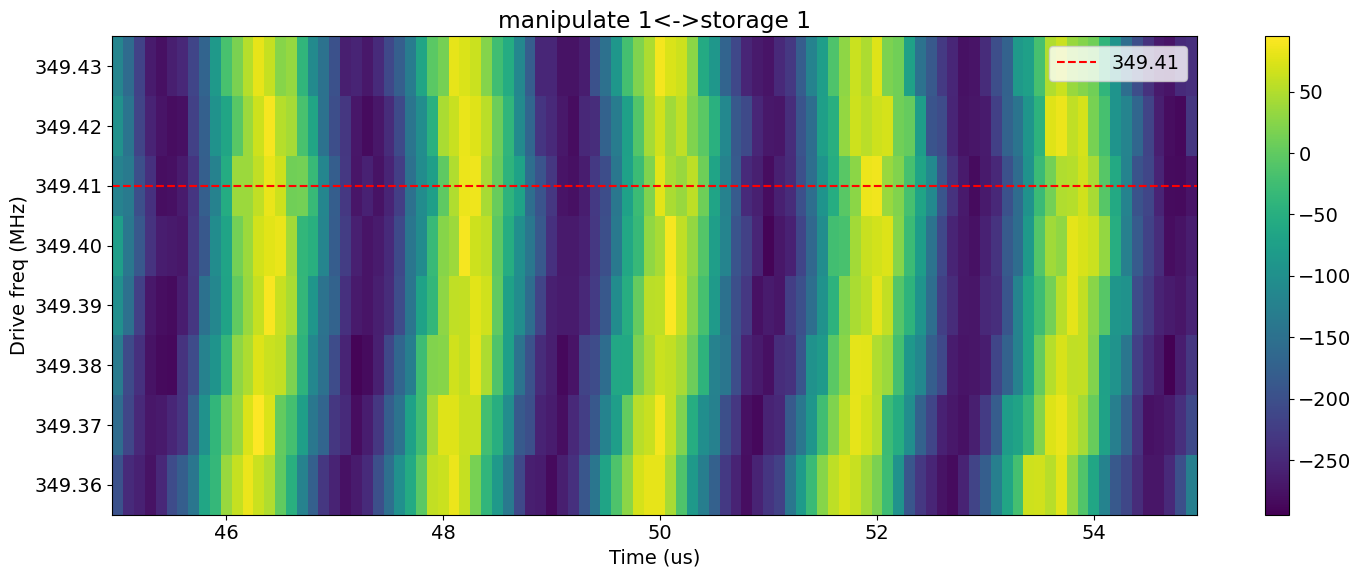

In [74]:
file_list = np.arange(4233,4241,1)
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['idata']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[349.41], vlines=None, active_reset=True, readout_per_round=4, threshold=-31, title="manipulate 1<->storage 1")
    

[226.08204415   0.53918207  92.0587678  104.78388349 -57.73554579
  -2.933     ]
Decay from avgi [us] 104.78388349058402
Rate [MHz] 0.5391820661671933
Pi length from avgi data [us]: 0.9167241115344573
	Pi/2 length from avgi data [us]: 0.4530588383603339
Fit params:  [226.08204415   0.53918207  92.0587678  104.78388349 -57.73554579
  -2.933     ]

Decay from avgq [us] 104.78388349058402
Rate [MHz] 0.5391820661671933
Pi length from avgq data [us]: 0.9167241115344573
Pi/2 length from avgq data [us]: 0.45836205576722866
Fit params:  [226.08204415   0.53918207  92.0587678  104.78388349 -57.73554579
  -2.933     ]


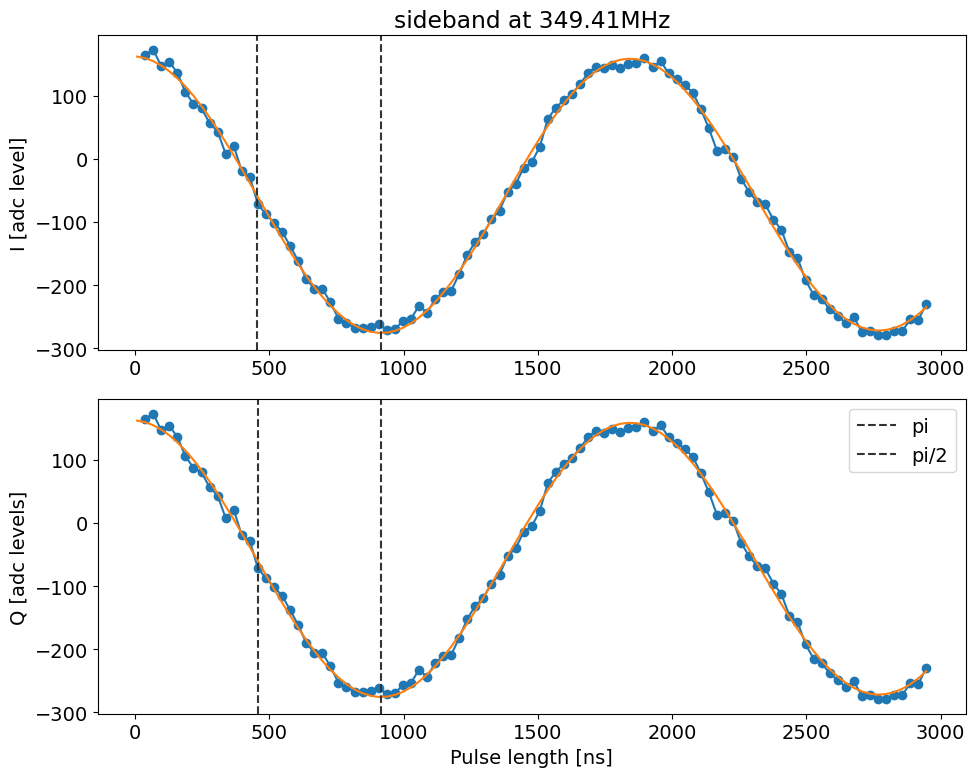

[166.05647779639716,
 164.5727830451757,
 172.68343163964346,
 146.30836926231666,
 153.4382318501171,
 135.85062316715542,
 105.35956328240897,
 86.86191359660748,
 79.64598559335403,
 56.285826470277684,
 42.99719359587781,
 7.438836416109143,
 20.18339573732719,
 -19.626576899583032,
 -28.887931260658533,
 -71.88063407181055,
 -87.95659431294511,
 -101.4321258378718,
 -115.42679987355444,
 -137.8582798780167,
 -161.59421535694446,
 -190.07944419765343,
 -205.7786566968385,
 -205.50441479252456,
 -227.31224923450532,
 -252.83073417454756,
 -259.58943270009667,
 -267.32790903875247,
 -267.9788993702475,
 -265.86205242126294,
 -261.8992120684194,
 -270.4333197228735,
 -270.073922549225,
 -256.4211709343288,
 -253.4679715776027,
 -232.62315316262686,
 -243.51613557813155,
 -222.50639452011404,
 -210.42454943016168,
 -209.03360651445328,
 -181.88015103608663,
 -151.88342230366771,
 -131.3223458452117,
 -118.3675746160533,
 -96.11674425370964,
 -81.91027154663519,
 -52.441597796143256,
 -

In [69]:

temp_data, attrs = prev_data(expt_path, '00140_SidebandGeneralExperiment.h5')
length_rabi_display(temp_data, fit=True, fitparams=None, title='sideband at '+str(attrs['config']['expt']['flux_drive'][1])+'MHz', 
                    active_reset=True, readout_per_round=4, threshold=-31)

### Store pi_length in dataframe

In [70]:
freq = attrs['config']['expt']['flux_drive'][1] 
pi_length =temp_data['pi_length']
pi2_length = temp_data['pi2_length']
gain = attrs['config']['expt']['flux_drive'][2]

ds.update_all('M1-S1', freq, 0.01, pi_length, pi2_length, gain)
ds.df

stor_name  freq (MHz)  precision (MHz)  pi (mus)  h_pi (mus)  \
0      M1-S1     349.410             0.01  0.916724    0.453059   
1      M1-S2     520.930             0.05  1.055448    0.522985   
2      M1-S3     696.660             0.05  1.252305    0.624012   
3      M1-S4     875.825             0.05  1.185166    0.586429   
4      M1-S5    1053.405             0.05  1.850023    0.924456   
5      M1-S6    1245.170             0.05  1.501549    0.748369   
6      M1-S7    1423.155             0.01  1.291502    0.639894   
7      M1-S8      -1.000            -1.00 -1.000000   -1.000000   
8      M1-S9      -1.000            -1.00 -1.000000   -1.000000   
9     M1-S10      -1.000            -1.00 -1.000000   -1.000000   
10    M1-S11      -1.000            -1.00 -1.000000   -1.000000   
11    M1-S12      -1.000            -1.00 -1.000000   -1.000000   
12        M1    2007.090             0.01  0.615287    0.307643   
13        M2    1834.895             0.01  1.060413    0.528845   
14     M2-S1     175.630             0.01  2.173484    1.086742   
15     M2-S2     346.840             0.01  0.908835    0.454417   
16     M2-S3     523.220             0.01  1.561615    0.780808   
17     M2-S4     702.650             0.01  1.386764    0.693382   
18     M2-S5     878.780             0.01  1.303372    0.651686   
19     M2-S6    1070.100             0.01  2.379622    1.189811   
20     M2-S7    1249.700             0.01  1.796981    0.898491   
21     M2-M1     173.790             0.01  0.463481    0.231741   

    gain (DAC units)                 last_update  
0               3000  2024-10-22 14:56:14.142211  
1               5000  2024-10-10 09:54:34.968490  
2               9000  2024-10-10 09:44:55.996470  
3               9000  2024-10-10 10:00:27.299587  
4               7500  2024-10-10 10:10:15.658400  
5              13500  2024-10-10 10:15:45.066438  
6              16500  2024-10-10 10:20:49.676156  
7                 -1                     51:31.3  
8                 -1                     51:31.3  
9                 -1                     51:31.3  
10                -1                     51:31.3  
11                -1                     51:31.3  
12             15000  2024-10-09 01:32:42.105957  
13             15000  2024-10-09 23:31:32.434744  
14              1000                     28:20.8  
15              5000                     33:56.1  
16              5000                     22:30.3  
17              9000                     25:33.1  
18             13500                     00:05.4  
19              9000                     30:59.0  
20             12000                     56:07.5  
21              2000  2024-10-06 01:47:25.946153

### hpi length from dual rail bs RB optimization

In [76]:
h_pi_length = 0.48857142857142855 # from optimization 

# fopr storage 2 
# 0.5650000000000001
# 0.5650000000000001

# for storage 3 
#  0.669011691823791


new_h_pi_lengths = [0.48857142857142855, 0.5650000000000001, 0.669011691823791, 0.6271437312608766, 0.9865989868431034, 0.797654995769661 ,0.6891793488410187]
labels = ['M1-S1', 'M1-S2', 'M1-S3', 'M1-S4', 'M1-S5', 'M1-S6', 'M1-S7']    

In [77]:
np.array(new_h_pi_lengths)*2

array([0.97714286, 1.13      , 1.33802338, 1.25428746, 1.97319797,
       1.59530999, 1.3783587 ])

### RB Check

In [223]:
# temp_data, attrs = prev_data(expt_path, '00348_SingleBeamSplitterRBPostSelection.h5')  
temp_data, attrs = prev_data(expt_path, '00303_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5')
# avg_readout, avg_readout_post, gg_list, ge_list, eg_list, ee_list = RB_extract_postselction_parity_fixed_excited(temp_data, active_reset=True)
avg_readout, avg_readout_post, gg, ge, eg, ee = RB_extract_postselction_excited(temp_data,attrs, active_reset=True)
print(np.average(avg_readout))
print(np.average(avg_readout_post))

gg 33
ge 871
eg 5
ee 63
gg 25
ge 863
eg 7
ee 72
gg 29
ge 864
eg 6
ee 73
gg 33
ge 852
eg 5
ee 71
gg 28
ge 882
eg 5
ee 56
gg 24
ge 885
eg 6
ee 58
gg 33
ge 841
eg 8
ee 78
gg 31
ge 845
eg 3
ee 81
gg 30
ge 876
eg 8
ee 61
gg 33
ge 871
eg 4
ee 65
gg 33
ge 881
eg 6
ee 59
gg 25
ge 894
eg 8
ee 57
gg 28
ge 874
eg 4
ee 60
gg 29
ge 839
eg 9
ee 71
gg 29
ge 858
eg 8
ee 69
gg 32
ge 854
eg 3
ee 73
gg 33
ge 877
eg 2
ee 53
gg 27
ge 864
eg 5
ee 71
gg 29
ge 872
eg 6
ee 62
gg 29
ge 874
eg 6
ee 63
gg 47
ge 858
eg 1
ee 61
gg 29
ge 873
eg 3
ee 65
gg 36
ge 851
eg 8
ee 76
gg 32
ge 856
eg 3
ee 83
gg 37
ge 876
eg 4
ee 57
gg 37
ge 867
eg 9
ee 60
gg 35
ge 891
eg 4
ee 47
gg 28
ge 858
eg 10
ee 72
gg 32
ge 853
eg 4
ee 78
gg 37
ge 856
eg 6
ee 69
968
0.9260047879696991
0.9936502941087423


In [219]:
gg_label = '|11>'
ge_label = '|10>'
eg_label = '|00>'
ee_label = '|01>'
twice_bool = False # only for 316
second_phase = 0

if attrs['config']['expt']['reset_qubit_after_parity']:
    if not twice_bool: 
        gg_label  = '|11>'
        ge_label = '|10>'
        eg_label = '|01>'
        ee_label = '|00>'
# elif not attrs['config']['expt']['parity_meas']:
#     if not twice_bool:
#         gg_label = '|00>'
#         ge_label = '|01>'
#         eg_label = '|10>'
#         ee_label = '|11>'
if second_phase ==180:
    print('second_pahje')
    gg_label = '|00>'
    ge_label = '|01>'
    eg_label = '|11>'
    ee_label = '|10>'
print('average ' + str(gg_label), np.average(gg))
print('average ' + str(ge_label), np.average(ge))
print('average ' + str(eg_label), np.average(eg))
print('average ' + str(ee_label), np.average(ee))

average |11> 0.024245930371296888
average |10> 0.6525929608837829
average |00> 0.026333699713060255
average |01> 0.29682740903185983


In [220]:
gg_label = '|11>'
ge_label = '|10>'
eg_label = '|01>'
ee_label = '|00>'
print('average ' + str(gg_label), np.average(gg))
print('average ' + str(ge_label), np.average(ge))
print('average ' + str(eg_label), np.average(eg))
print('average ' + str(ee_label), np.average(ee))

average |11> 0.024245930371296888
average |10> 0.6525929608837829
average |01> 0.026333699713060255
average |00> 0.29682740903185983


In [221]:
0.6525929608837829 / (0.6525929608837829 +0.026333699713060255 )

0.961212747648015

In [203]:
0.0035883088073162344 / (0.0035883088073162344 + 0.05579987114023788)

0.06042126245466827

In [120]:
attrs['config']['expt']['parity_meas']

False

In [66]:
length

NameError: name 'length' is not defined

In [25]:
temp_data

{'Idata': array([[[ 3.26542208e+02,  4.24389610e+02,  1.40818182e+02, ...,
           3.72399351e+02,  2.35590909e+02,  3.71659091e+02],
         [-2.26181818e+02,  4.75912338e+02,  2.84837662e+02, ...,
          -1.89987013e+02,  3.09022727e+02, -1.25788961e+02],
         [ 2.54097403e+02,  3.14211039e+02,  2.98454545e+02, ...,
           3.11698052e+02,  1.76019481e+02,  3.30441558e+02],
         [ 2.09951299e+02,  3.14168831e+02,  3.40441558e+02, ...,
           1.49457792e+02,  3.30996753e+02,  3.34561688e+02],
         [ 3.20551948e+02,  1.79876623e+02,  2.85928571e+02, ...,
           3.11636364e+02,  3.63847403e+02,  2.56074675e+02]],
 
        [[ 3.54555195e+02,  3.77064935e+02,  2.40103896e+02, ...,
           3.07000000e+02,  1.80525974e+02,  1.40714286e+02],
         [-1.87814935e+02, -1.93512987e+02,  2.57870130e+02, ...,
          -2.19188312e+01,  3.06766234e+02,  2.31811688e+02],
         [-1.38905844e+02,  3.96821429e+02,  2.28048701e+02, ...,
           3.30629870e+02,

In [18]:
ee

[1.0, 1.0, 0.989247311827957, 0.984, 1.0]

### POST SELECTION

982.0265208465921
975.0273426866435
971.0275506318246
972.0297745004019
1913.0587282249976
1953.070493975179
2940.108727211348
2939.1136192742847
2917.132188726476
2927.130036736574
4889.226647273255
4891.26170532596
9750.576730623528
9786.585225956327
9766.596897364616
9791.61275878213


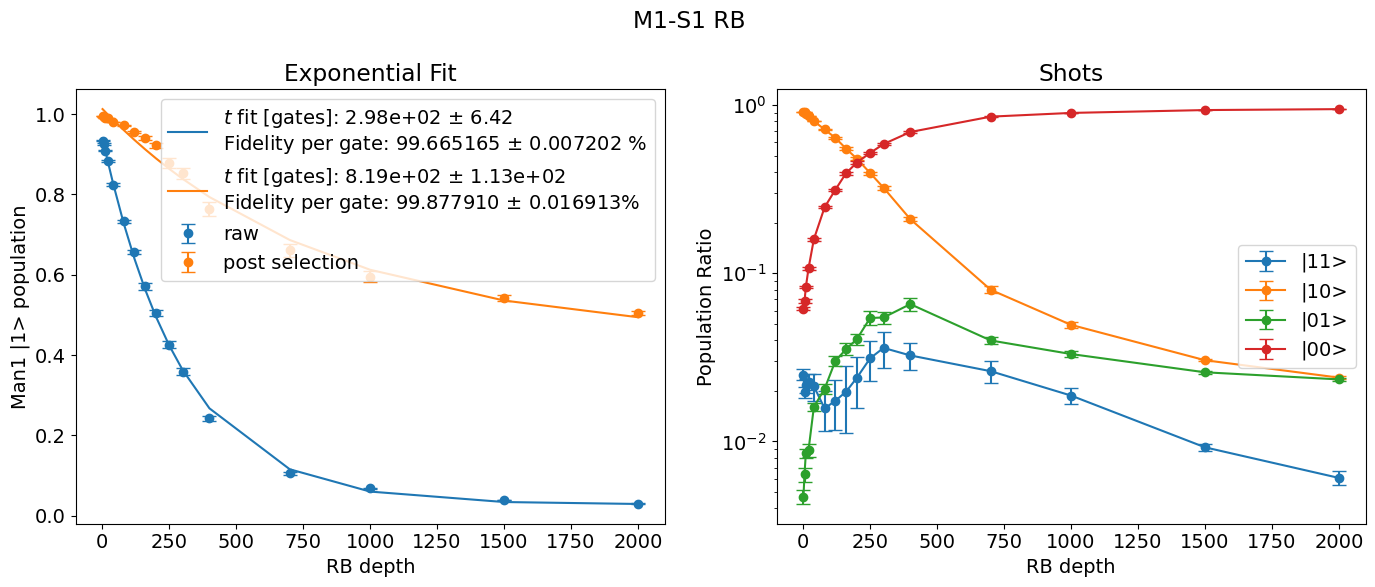

In [23]:

# file_list = np.arange(548, 569, 1)
file_list = np.arange(548, 564, 1)
# file_list = np.arange(450, 478, 1)
return_args = show_rb(prev_data, expt_path, file_list, name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title = 'M1-S1 RB')
fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

In [52]:
depth_list

[1, 5, 10, 20, 40, 80, 120, 160, 200, 250, 300, 400, 700, 1000, 1500, 2000]

Text(0, 0.5, 'fidelity ratio')

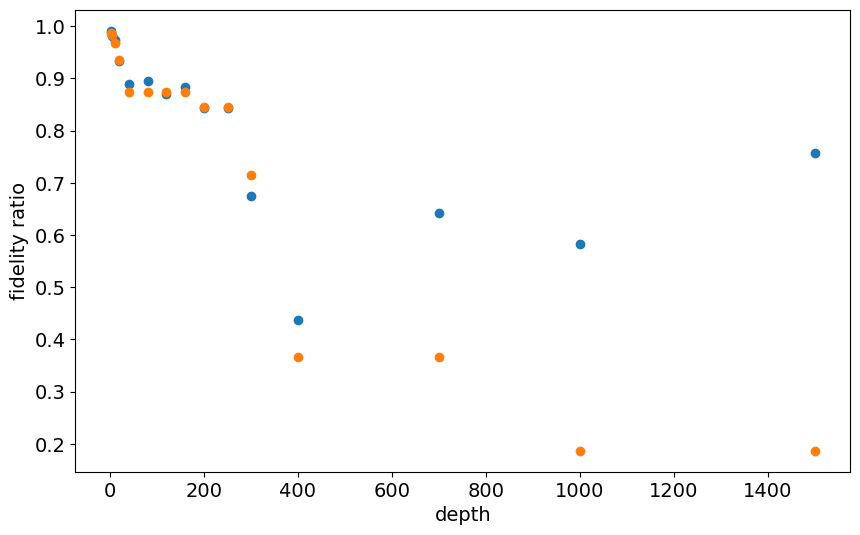

In [50]:
ratios = np.zeros(len(fids_list) -1 )
for idx, fid  in enumerate(fids_list[:-1]):
    depth1 = depth_list[idx]
    depth2 = depth_list[idx+1]
    ratios[idx] = (fids_list[idx+1] / fids_list[idx])

fid = 0.99665
ideal_ratios = np.zeros(len(fids_list) -1)
for idx,  __ in enumerate(fids_list[:-1]):
    depth1 = depth_list[idx]
    depth2 = depth_list[idx+1]
    ideal_ratios[idx] = fid ** (depth2 - depth1)
ideal_ratios
plt.plot(depth_list[:-1],  ratios, 'o', label = 'measured')
plt.plot(depth_list[:-1],  ideal_ratios, 'o', label = 'ideal')
plt.xlabel('depth')
plt.ylabel('fidelity ratio')

array([0.98805389, 0.98508973, 0.97040178, 0.94167961, 0.88676049,
       0.88676049, 0.88676049, 0.88676049, 0.86051395, 0.86051395,
       0.74048426, 0.40602006, 0.40602006, 0.22262768, 0.22262768])

In [443]:
ebars_list

[0.0016098005294681022,
 0.0018226997647139613,
 0.0016398495015559462,
 0.0024134820202573854,
 0.003678436492527021,
 0.004116402124782121,
 0.005971192113733522,
 0.008681216546607416,
 0.008305894738823122,
 0.008536052345099401,
 0.008863898475142575,
 0.0062636149976684425,
 0.0037020935717680314,
 0.0017278431469143123,
 0.0005644172644854076,
 0.0005645452116591778]

In [18]:
fids_list

[0.933563187108675,
 0.92539176866761,
 0.9087188054244721,
 0.8840371531169321,
 0.8243200041125598,
 0.732525065550077,
 0.656262948628661,
 0.5711454069490541,
 0.5045778560471665,
 0.42591115587216233,
 0.3588287632837851,
 0.2423387017769282,
 0.10600582186827374,
 0.06812440980482957,
 0.03966076721432621,
 0.030040979728466196]

In [20]:
depth_list

[1, 5, 10, 20, 40, 80, 120, 160, 200, 250, 300, 400, 700, 1000, 1500, 2000]

In [16]:
fids_post_list[6]

0.9547691774726774

In [245]:
xlist

[1,
 5,
 10,
 20,
 40,
 80,
 120,
 160,
 200,
 250,
 300,
 400,
 700,
 1000,
 1500,
 2000,
 2500]

## M1-S2

979.0265669895799
977.0265193981064
980.0261728990828
970.0280409400505
1952.0585260996668
1944.0663410600182
2946.1061841546302
2941.11133879114
2937.1159776902095
2934.1262700017123
4881.218433689823
4924.232472071066
9812.538581845902
9742.567608117253


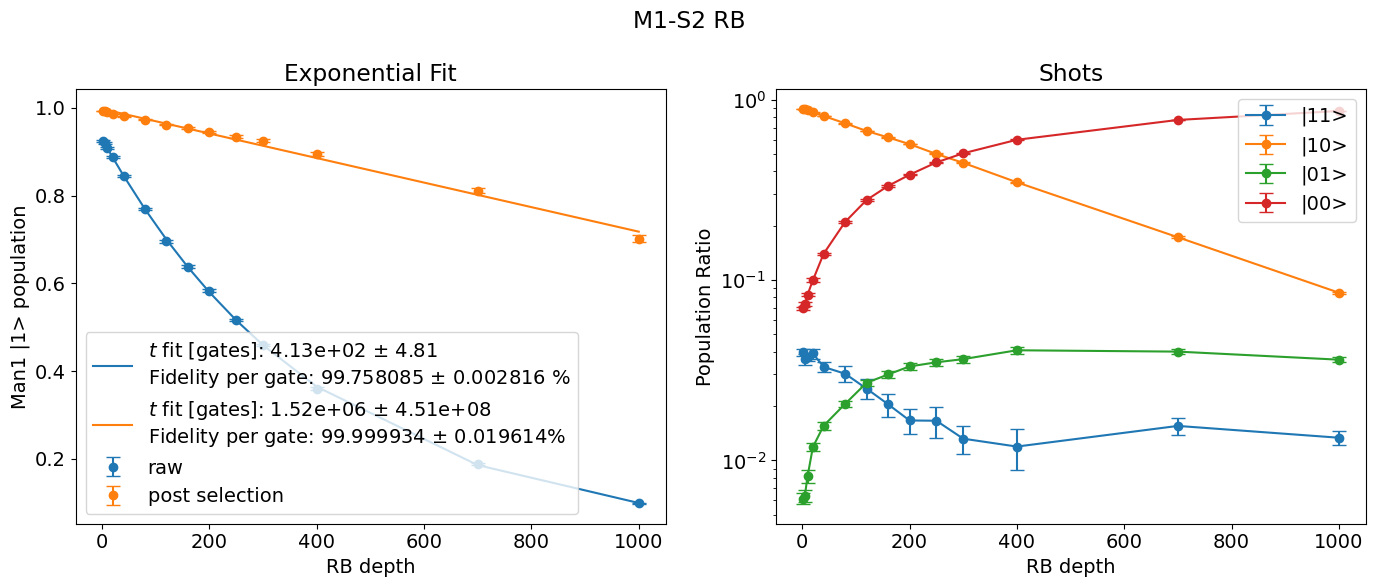

In [19]:
file_list = np.arange(464, 478, 1)
# file_list = np.arange(324, 345, 1)
analyis = MM_DualRail_Analysis()
return_args = analyis.show_rb(prev_data = prev_data, expt_path = expt_path, file_list = file_list, name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title = 'M1-S2 RB')
# fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

In [ ]:
raw_fid = 99.758
ps_fid = 99.

In [6]:
1- ((0.9975)**(3/2))

0.0037476552725207446

In [7]:
1- ((0.995)**(3/2))

0.007490617172814851

In [76]:
fids_list = return_args[0]
fids_post_list = return_args[1]
gg_list = return_args[2]
ge_list = return_args[3]
eg_list = return_args[4]
ee_list = return_args[5]
gg_list_err = return_args[6]
ge_list_err = return_args[7]
eg_list_err = return_args[8]
ee_list_err = return_args[9]
xlist = return_args[10]
depth_list = return_args[11]

In [53]:
eg_list

[0.006140929997802771,
 0.006375082229144991,
 0.008154886762356936,
 0.011866063157019135,
 0.01556656115920651,
 0.02056153861436162,
 0.026929677596274026,
 0.029932523397476585,
 0.03316350982299625,
 0.0349693131339907,
 0.03640939118349948,
 0.040773688561755235,
 0.04007961302569285,
 0.03616104037866625]

In [23]:
xlist

[1, 5, 10, 20, 40, 80, 120, 160, 200, 250, 300, 400, 700, 1000]

### Explore double exponential fitting 

Optimal parameters: a = 0.30000000000000004, b = -0.0015264946666099838, c = 0.6401361938100092, d = -0.0040229555841339235, e = -1.0362600807299667e-41
r1 = 655.0956396204023, r1_err = 471.73874108756934, r2 = 248.5734627406491, r2_err = 79.7910574645631
r1_fid = 0.9984746698337638, r1_fid_err = 0.001097562292263069, r2_fid = 0.9959851256612197, r2_fid_err = 0.0012861675520139913


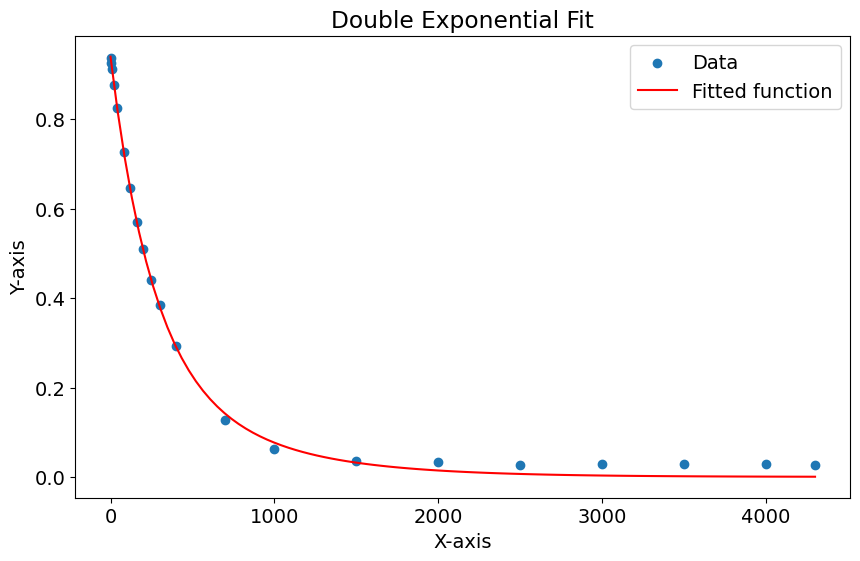

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def double_exponential_fit(x_data, y_data):
    """
    Fit data with a double exponential function and plot the results.

    Parameters:
    x_data (array-like): The x-coordinates of the data points.
    y_data (array-like): The y-coordinates of the data points.

    Returns:
    None
    """
    # Define the double exponential function
    def double_exponential(x, a, b, c, d, e):
        return a * np.exp(b * x) + c * np.exp(d * x) + e

    # Fit the double exponential function to the data
    lower_bounds = [0.3, -np.inf, 0, -np.inf, -np.inf]
    upper_bounds = [1, 0,1, 0, 0]
    popt, pcov = curve_fit(double_exponential, x_data, y_data, p0=[0.5, -1, 0.5, -1, -0.2], maxfev=10000, 
                           bounds=(lower_bounds, upper_bounds))

    # Extract the optimal parameters
    a_opt, b_opt, c_opt, d_opt, e_opt = popt

    # Print the optimal parameters
    print(f"Optimal parameters: a = {a_opt}, b = {b_opt}, c = {c_opt}, d = {d_opt}, e = {e_opt}")

    # Convert b and d to gates
    r1 = 1 / np.abs(b_opt)
    r1_err = np.abs(np.sqrt(pcov[1][1]) / b_opt**2)
    r2 = 1 / np.abs(d_opt)
    r2_err = np.sqrt(pcov[3][3]) / np.abs(d_opt)**2
    print(f"r1 = {r1}, r1_err = {r1_err}, r2 = {r2}, r2_err = {r2_err}")

    # Calculate the fidelity
    r1_fid = np.exp(-1 / r1)
    r1_fid_err = np.exp(-1 / r1) * r1_err / (r1**2)
    r2_fid = np.exp(-1 / r2)
    r2_fid_err = np.exp(-1 / r2) * r2_err / (r2**2)
    print(f"r1_fid = {r1_fid}, r1_fid_err = {r1_fid_err}, r2_fid = {r2_fid}, r2_fid_err = {r2_fid_err}")

    # Plot the data and the fitted function
    plt.scatter(x_data, y_data, label='Data')
    x_fit = np.linspace(0, max(x_data), 100)
    y_fit = double_exponential(x_fit, *popt)
    plt.plot(x_fit, y_fit, label='Fitted function', color='red')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Double Exponential Fit')
    plt.legend()
    plt.show()

# Example usage
xlist = depth_list
ylist = fids_list
double_exponential_fit(xlist, ylist)

Optimal parameters: a = 0.8969579366327035, b = -0.002243949257162798, c = 0.03966828018040048
r = 445.6428757503986, r_err = 4.8135752297992775
r_fid = 0.9977585665148648, r_fid_err = 2.41835076613937e-05


C:\Users\26049\AppData\Local\Temp\ipykernel_7380\2219549172.py:18: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c


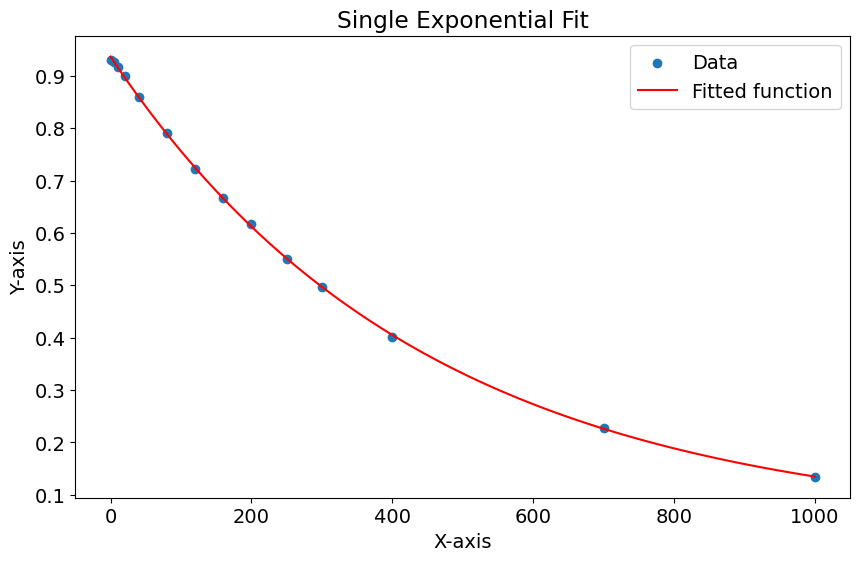

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def single_exponential_fit(x_data, y_data):
    """
    Fit data with a single exponential function and plot the results.

    Parameters:
    x_data (array-like): The x-coordinates of the data points.
    y_data (array-like): The y-coordinates of the data points.

    Returns:
    None
    """
    # Define the single exponential function
    def single_exponential(x, a, b, c):
        return a * np.exp(b * x) + c

    # Fit the single exponential function to the data
    popt, pcov = curve_fit(single_exponential, x_data, y_data, p0=[1, -1, 1], maxfev=10000)

    # Extract the optimal parameters
    a_opt, b_opt, c_opt = popt

    # Print the optimal parameters
    print(f"Optimal parameters: a = {a_opt}, b = {b_opt}, c = {c_opt}")

    # Convert b to gates
    r = 1 / np.abs(b_opt)
    r_err = np.abs(np.sqrt(pcov[1][1]) / b_opt**2)
    print(f"r = {r}, r_err = {r_err}")

    # Calculate the fidelity
    r_fid = np.exp(-1 / r)
    r_fid_err = np.exp(-1 / r) * r_err / (r**2)
    print(f"r_fid = {r_fid}, r_fid_err = {r_fid_err}")

    # Plot the data and the fitted function
    plt.scatter(x_data, y_data, label='Data')
    x_fit = np.linspace(0, max(x_data), 100)
    y_fit = single_exponential(x_fit, *popt)
    plt.plot(x_fit, y_fit, label='Fitted function', color='red')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Single Exponential Fit')
    plt.legend()
    plt.show()

# Example usage
xlist = depth_list
ylist = 1 - np.array(ee_list)
single_exponential_fit(xlist, ylist)

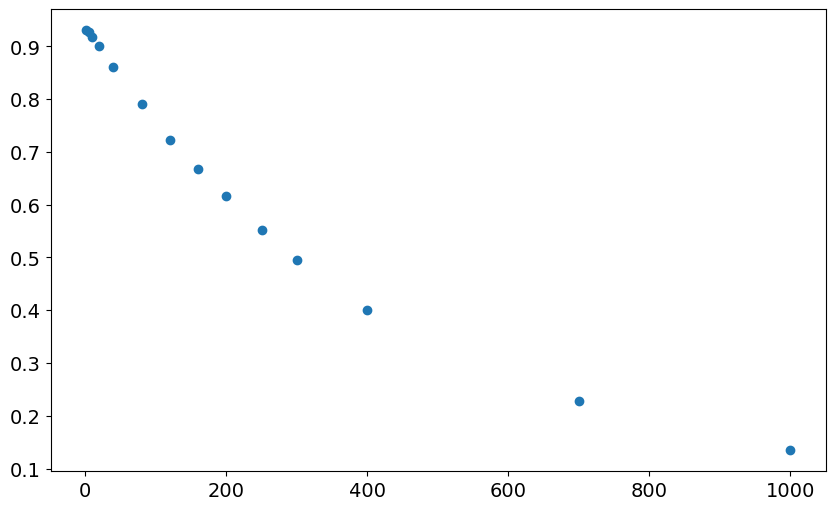

In [57]:
plt.plot(depth_list, 1 - np.array( ee_list), 'o')

In [25]:
fids_list

[0.9242432691937842,
 0.9202308220420709,
 0.9089471512381895,
 0.88829680988991,
 0.844554235372455,
 0.7695436649761683,
 0.6953841593055297,
 0.6377752428935761,
 0.5836088500746601,
 0.5162520973069257,
 0.4595428993947991,
 0.3601501372714383,
 0.18813558156552795,
 0.09840552924604995]

In [22]:
a = [1,2]
b = a.copy()
b.remove(1)
b

[2]

gg 51
ge 868
eg 6
ee 54
gg 48
ge 881
eg 4
ee 49
gg 52
ge 858
eg 3
ee 65
gg 52
ge 882
eg 3
ee 45
gg 44
ge 859
eg 13
ee 58
gg 41
ge 861
eg 11
ee 67
gg 57
ge 872
eg 13
ee 46
gg 52
ge 870
eg 10
ee 53
gg 43
ge 874
eg 8
ee 58
gg 49
ge 879
eg 8
ee 48
gg 52
ge 871
eg 10
ee 46
gg 45
ge 847
eg 7
ee 78
gg 38
ge 873
eg 4
ee 61
gg 51
ge 865
eg 9
ee 47
gg 55
ge 860
eg 10
ee 53
gg 51
ge 862
eg 7
ee 57
gg 47
ge 863
eg 8
ee 64
gg 47
ge 867
eg 2
ee 62
gg 49
ge 877
eg 2
ee 58
gg 48
ge 856
eg 6
ee 61
gg 50
ge 854
eg 8
ee 62
gg 37
ge 880
eg 9
ee 57
gg 53
ge 856
eg 5
ee 62
gg 52
ge 869
eg 5
ee 55
gg 56
ge 860
eg 3
ee 59
gg 52
ge 870
eg 13
ee 46
gg 41
ge 866
eg 11
ee 55
gg 37
ge 882
eg 9
ee 46
gg 43
ge 872
eg 4
ee 58
gg 46
ge 880
eg 3
ee 47
976.0257846954052
gg 34
ge 850
eg 13
ee 62
gg 41
ge 857
eg 6
ee 58
gg 50
ge 851
eg 10
ee 67
gg 37
ge 843
eg 10
ee 69
gg 48
ge 867
eg 4
ee 45
gg 37
ge 863
eg 9
ee 63
gg 40
ge 852
eg 15
ee 70
gg 49
ge 845
eg 6
ee 74
gg 49
ge 852
eg 10
ee 58
gg 55
ge 842
eg 13
ee 60
gg 45
ge

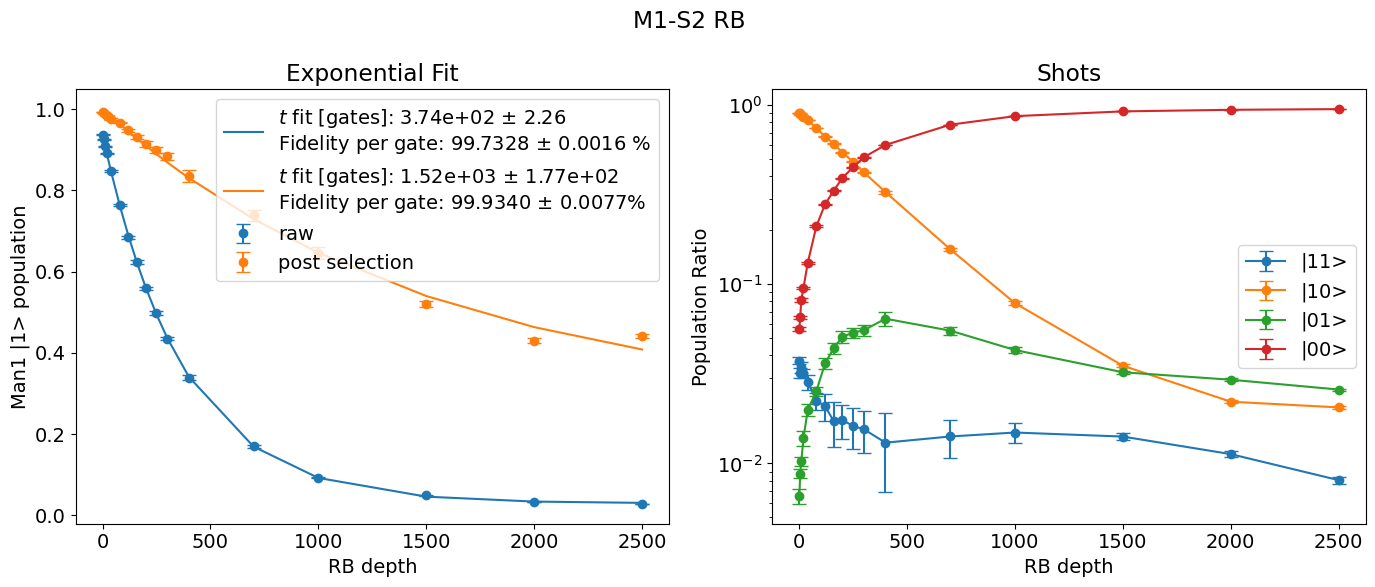

In [264]:
file_list = np.arange(324, 341, 1)
# file_list = np.arange(324, 345, 1)
return_args = show_rb(prev_data, expt_path, file_list, name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title = 'M1-S2 RB')
fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

In [ ]:
raw_fid = 99.7328

gg 50
ge 861
eg 30
ee 48
gg 44
ge 838
eg 31
ee 48
gg 66
ge 832
eg 26
ee 50
gg 46
ge 859
eg 32
ee 42
gg 37
ge 852
eg 28
ee 62
gg 52
ge 844
eg 35
ee 47
gg 50
ge 862
eg 17
ee 53
gg 44
ge 843
eg 27
ee 61
gg 33
ge 875
eg 28
ee 42
gg 42
ge 855
eg 33
ee 43
gg 48
ge 850
eg 27
ee 55
gg 38
ge 871
eg 27
ee 50
gg 61
ge 845
eg 25
ee 53
gg 54
ge 851
eg 33
ee 48
gg 40
ge 863
eg 32
ee 43
gg 53
ge 855
eg 25
ee 36
gg 58
ge 843
eg 25
ee 55
gg 56
ge 846
eg 25
ee 57
gg 39
ge 858
eg 25
ee 49
gg 47
ge 866
eg 21
ee 44
gg 37
ge 870
eg 23
ee 55
gg 46
ge 855
eg 27
ee 53
gg 57
ge 833
eg 30
ee 57
gg 51
ge 854
eg 37
ee 42
gg 52
ge 846
eg 45
ee 37
gg 40
ge 867
eg 29
ee 55
gg 47
ge 869
eg 27
ee 39
gg 54
ge 841
eg 27
ee 45
gg 49
ge 834
eg 39
ee 48
gg 53
ge 826
eg 35
ee 59
973
gg 41
ge 832
eg 34
ee 64
gg 32
ge 853
eg 41
ee 52
gg 50
ge 839
eg 41
ee 43
gg 46
ge 838
eg 46
ee 50
gg 46
ge 845
eg 35
ee 51
gg 50
ge 867
eg 25
ee 39
gg 57
ge 840
eg 29
ee 54
gg 47
ge 844
eg 42
ee 51
gg 54
ge 858
eg 38
ee 33
gg 46
ge 846
eg 42
ee

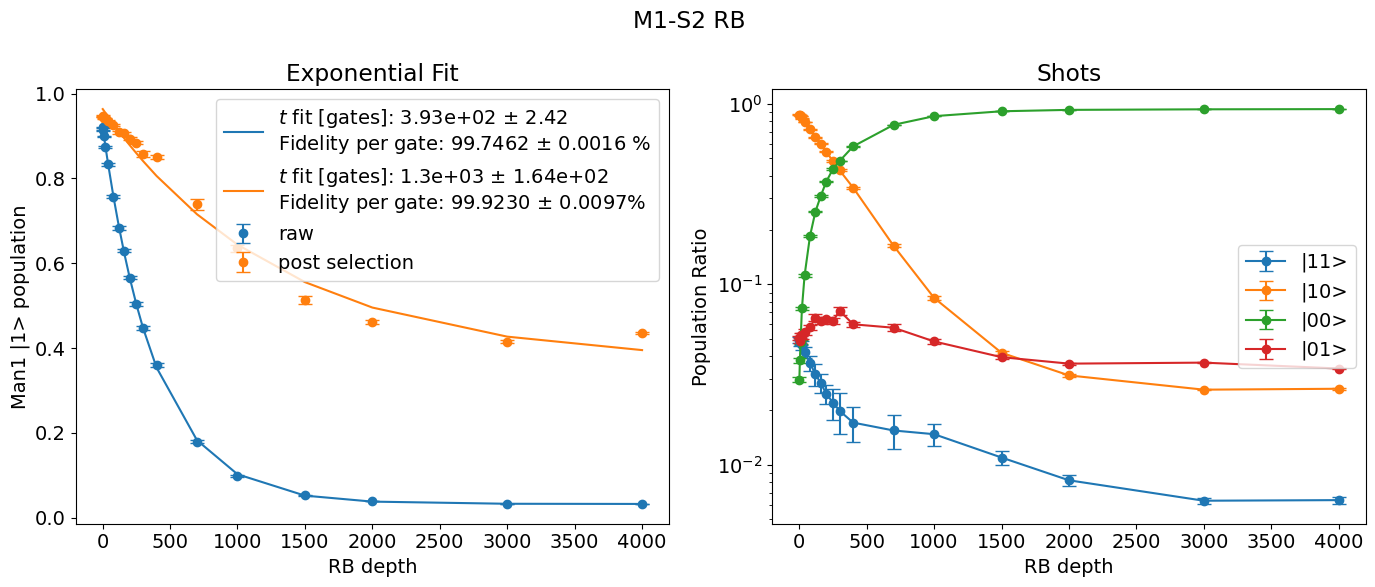

In [180]:
# file_list = np.arange(30,48,1)
file_list = np.arange(195, 213, 1)
return_args = show_rb(prev_data, expt_path, file_list, name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title = 'M1-S2 RB')
fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

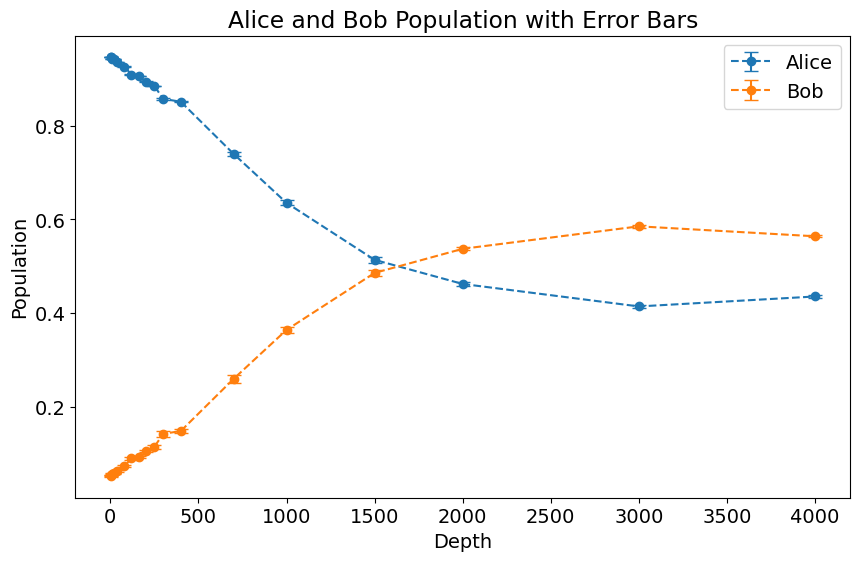

In [181]:

# Convert lists to numpy arrays
alice_list = np.array(ge_list)
bob_list = np.array(ee_list)
alice_list_err = np.array(ge_list_err)
bob_list_err = np.array(ee_list_err)

# Normalize the data
alice_norm = alice_list / (alice_list + bob_list)
bob_norm = bob_list / (alice_list + bob_list)

# Calculate error bars for normalized data
ebar_alice_norm = (1 / (alice_list + bob_list) - alice_list / (alice_list + bob_list)**2) * alice_list_err
ebar_bob_norm = (1 / (alice_list + bob_list) - bob_list / (alice_list + bob_list)**2) * bob_list_err

# Plot the data with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(xlist, alice_norm, yerr=ebar_alice_norm, fmt='--o', label='Alice', capsize=5)
plt.errorbar(xlist, bob_norm, yerr=ebar_bob_norm, fmt='--o', label='Bob', capsize=5)
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Population')
plt.title('Alice and Bob Population with Error Bars')
plt.show()

### RB Check

reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after

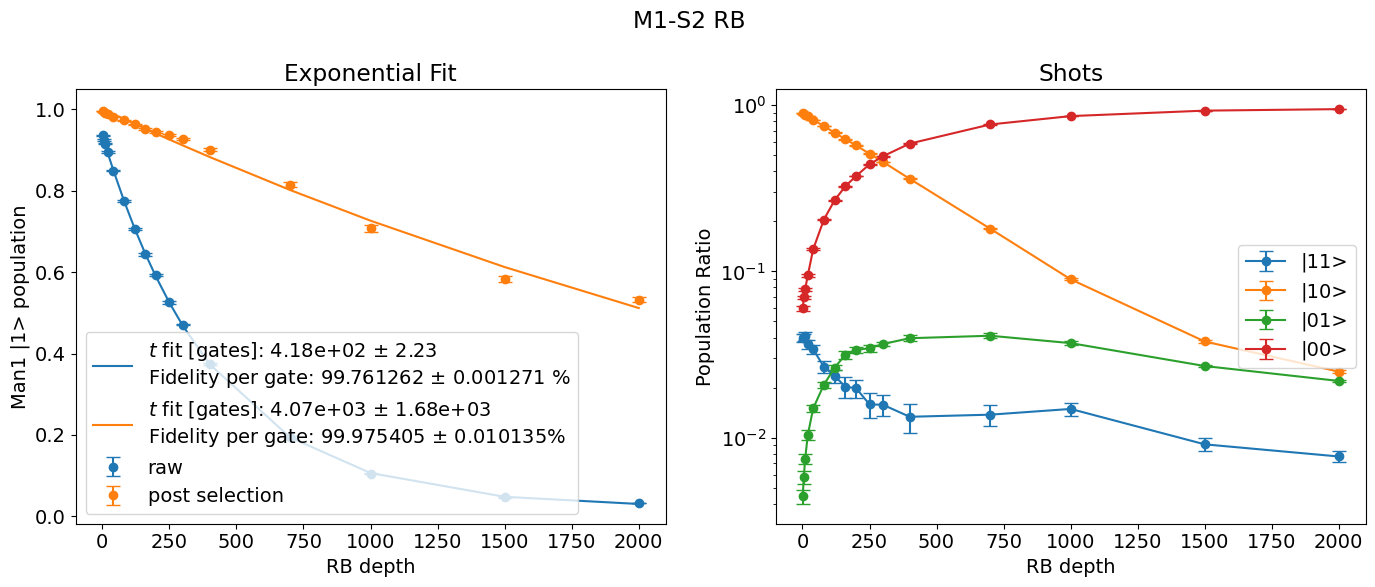

In [445]:
# file_list = np.arange(478, 492, 1)
file_list = np.arange(569, 585, 1)
# file_list = np.arange(569, 590, 1)
return_args = show_rb(prev_data, expt_path, file_list, name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title = 'M1-S2 RB')
fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

## M1-S3

### RB Check

reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after

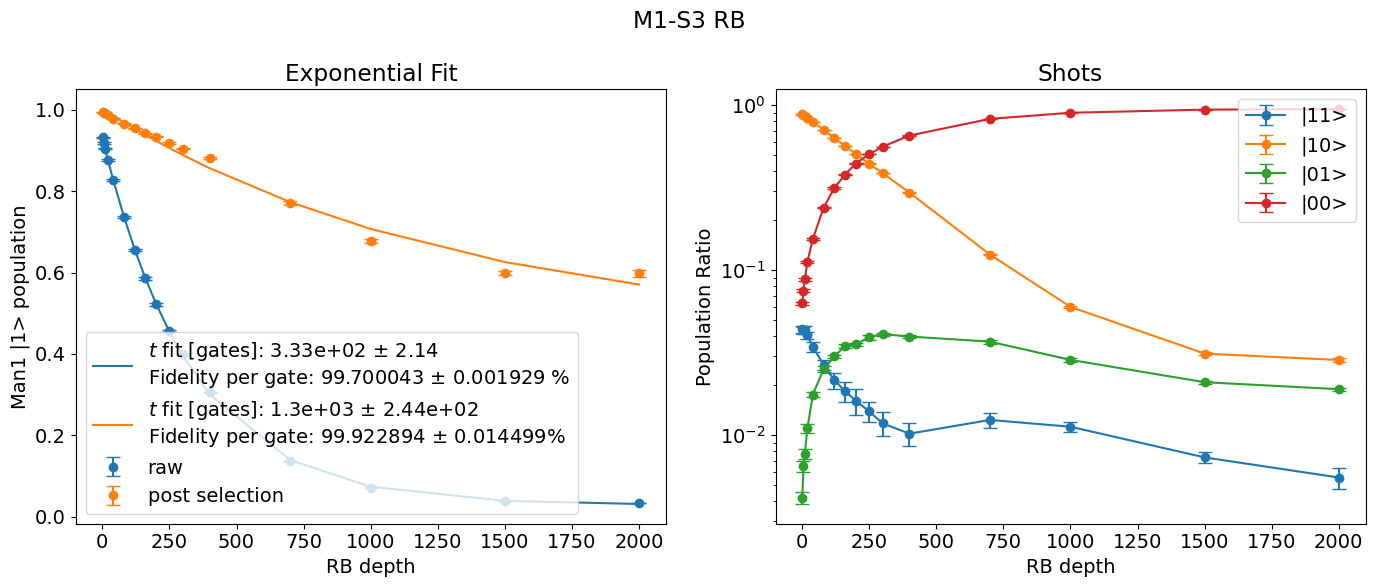

In [446]:
# file_list = np.arange(478, 492, 1)
# file_list = np.arange(590, 611, 1)
file_list = np.arange(590, 606, 1)
return_args = show_rb(prev_data, expt_path, file_list, name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title = 'M1-S3 RB')
fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

gg 50
ge 861
eg 30
ee 48
gg 44
ge 838
eg 31
ee 48
gg 66
ge 832
eg 26
ee 50
gg 46
ge 859
eg 32
ee 42
gg 37
ge 852
eg 28
ee 62
gg 52
ge 844
eg 35
ee 47
gg 50
ge 862
eg 17
ee 53
gg 44
ge 843
eg 27
ee 61
gg 33
ge 875
eg 28
ee 42
gg 42
ge 855
eg 33
ee 43
gg 48
ge 850
eg 27
ee 55
gg 38
ge 871
eg 27
ee 50
gg 61
ge 845
eg 25
ee 53
gg 54
ge 851
eg 33
ee 48
gg 40
ge 863
eg 32
ee 43
gg 53
ge 855
eg 25
ee 36
gg 58
ge 843
eg 25
ee 55
gg 56
ge 846
eg 25
ee 57
gg 39
ge 858
eg 25
ee 49
gg 47
ge 866
eg 21
ee 44
gg 37
ge 870
eg 23
ee 55
gg 46
ge 855
eg 27
ee 53
gg 57
ge 833
eg 30
ee 57
gg 51
ge 854
eg 37
ee 42
gg 52
ge 846
eg 45
ee 37
gg 40
ge 867
eg 29
ee 55
gg 47
ge 869
eg 27
ee 39
gg 54
ge 841
eg 27
ee 45
gg 49
ge 834
eg 39
ee 48
gg 53
ge 826
eg 35
ee 59
973
gg 41
ge 832
eg 34
ee 64
gg 32
ge 853
eg 41
ee 52
gg 50
ge 839
eg 41
ee 43
gg 46
ge 838
eg 46
ee 50
gg 46
ge 845
eg 35
ee 51
gg 50
ge 867
eg 25
ee 39
gg 57
ge 840
eg 29
ee 54
gg 47
ge 844
eg 42
ee 51
gg 54
ge 858
eg 38
ee 33
gg 46
ge 846
eg 42
ee

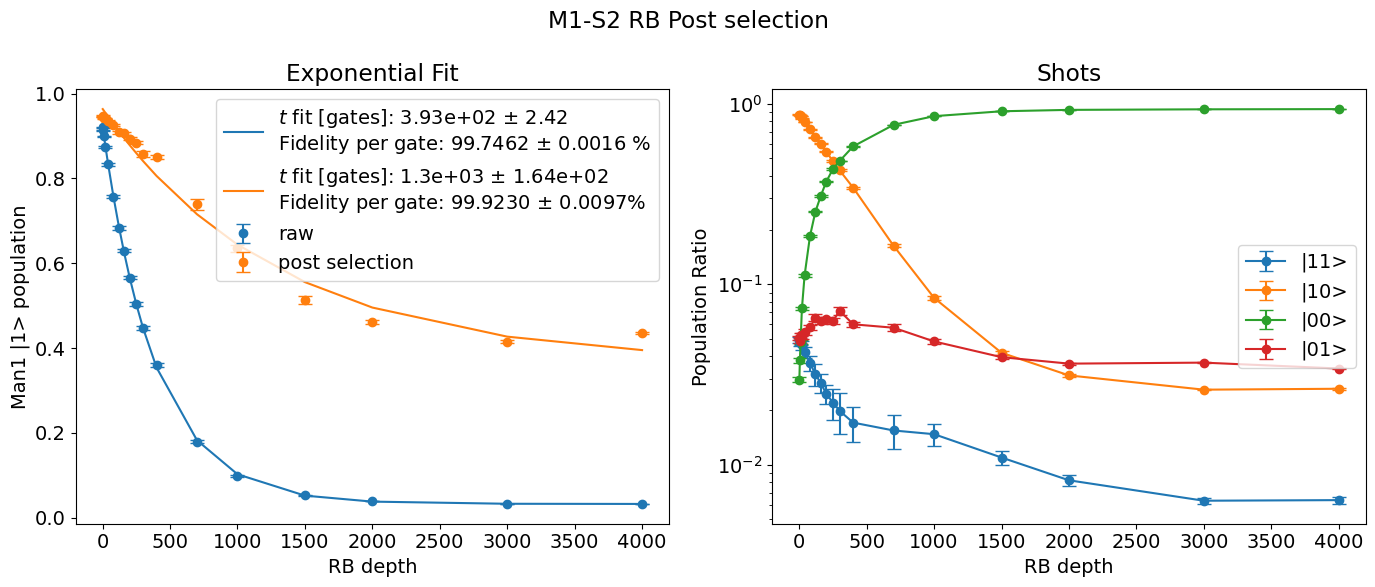

In [145]:
# file_list = np.arange(12,30,1)
# file_list = np.arange(149, 167, 1) # f0g1 readout 
file_list = np.arange(195, 213, 1) # f1g0 readout   
name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5'

# plt.figure(figsize=(12,5))
# plt.subplot(111)

#for idx, prepulse_label in enumerate(prepulse_list_labels):

Pgg = 0.997573060976843
Pge = 0.0024269390231570487
Peg = 0.012984367839503025
Pee = 0.9870156321604969

P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])
conf_matrix = inv(P_matrix)

tensor_product_matrix = np.kron(conf_matrix, conf_matrix)

fids_list = []
fids_post_list = []
gg_list = []
ge_list = []
eg_list = []
ee_list = []
gg_list_err = []
ge_list_err = []
eg_list_err = []
ee_list_err = []
xlist = []
depth_list = []
ebars_list = []
ebars_post_list = []
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  
    avg_readout, avg_readout_post, gg, ge, eg, ee = RB_extract_postselction_excited(temp_data,attrs, active_reset=True) #, conf_matrix=None)
    # print(gg[0]+ge[0]+eg[0]+ee[0])
    # print number of gg shots
    
    gg_list.append(np.average(gg))
    ge_list.append(np.average(ge))
    eg_list.append(np.average(eg))
    ee_list.append(np.average(ee))
    fids_list.append(np.average(avg_readout))
    ebars_list.append(np.std(avg_readout)/np.sqrt(len(avg_readout)))
    gg_list_err.append(np.std(ge)/np.sqrt(len(ge)))
    ge_list_err.append(np.std(ge)/np.sqrt(len(ge)))
    eg_list_err.append(np.std(eg)/np.sqrt(len(eg)))
    ee_list_err.append(np.std(ee)/np.sqrt(len(ee)))


    fids_post_list.append(np.average(avg_readout_post))
    ebars_post_list.append(np.std(avg_readout_post)/np.sqrt(len(avg_readout_post)))
    xlist.append(attrs['config']['expt']['rb_depth']*attrs['config']['expt']['bs_repeat'])
    depth_list.append(attrs['config']['expt']['rb_depth']*attrs['config']['expt']['bs_repeat'])


plot_rb(fids_list = fids_list, fids_post_list = fids_post_list, xlist=depth_list, 
            gg_list = gg_list, gg_list_err = gg_list_err, ge_list = ge_list, ge_list_err = ge_list_err, 
            eg_list = eg_list, eg_list_err = eg_list_err, ee_list = ee_list, ee_list_err = ee_list_err,
            ebars_list=ebars_list, ebars_post_list=ebars_post_list, reset_qubit_after_parity = attrs['config']['expt']['reset_qubit_after_parity'],
            parity_meas=attrs['config']['expt']['parity_meas'],
            title='M1-S2 RB Post selection')

In [144]:
fids_list

[0.9200487017578494,
 0.9133172577298991,
 0.8993572597954611,
 0.874936306218268,
 0.8334923041452681,
 0.7572395116631497,
 0.6822775501716531,
 0.6291330945588007,
 0.566240341542737,
 0.5030150538521594,
 0.4469327907823756,
 0.35974787908070277,
 0.17873117008075956,
 0.0988431746780417,
 0.05270307662681476,
 0.039489442814889614,
 0.032401966974133486,
 0.03275662901440422,
 0.9275623471812423,
 0.915150529028827,
 0.8990617750372462,
 0.8783617347813191,
 0.8236188764402875,
 0.7432455991655025,
 0.6595340071797001,
 0.5972648939306305,
 0.5238332102587587,
 0.464075572223313,
 0.3961695140292916,
 0.3012266548990483,
 0.13409419115325757,
 0.07147978979272676,
 0.03715025750252051,
 0.031086645569023443,
 0.0278999850534841]

## M1-S4

978.0260056692914
982.0267977558831
977.0269823087424
982.0284763460922
1888.0576526394002
1935.0657015639645
2912.107501179301
2907.115799499413
2892.120316734393
2914.1270347971677
4860.224444089496
4875.246229393684
9757.555889546635
9785.589691781523
9820.605676151128
9778.599541172853
9777.599216075712
9772.604439508315
9764.601648565791
9748.605951399244
9801.611160427716


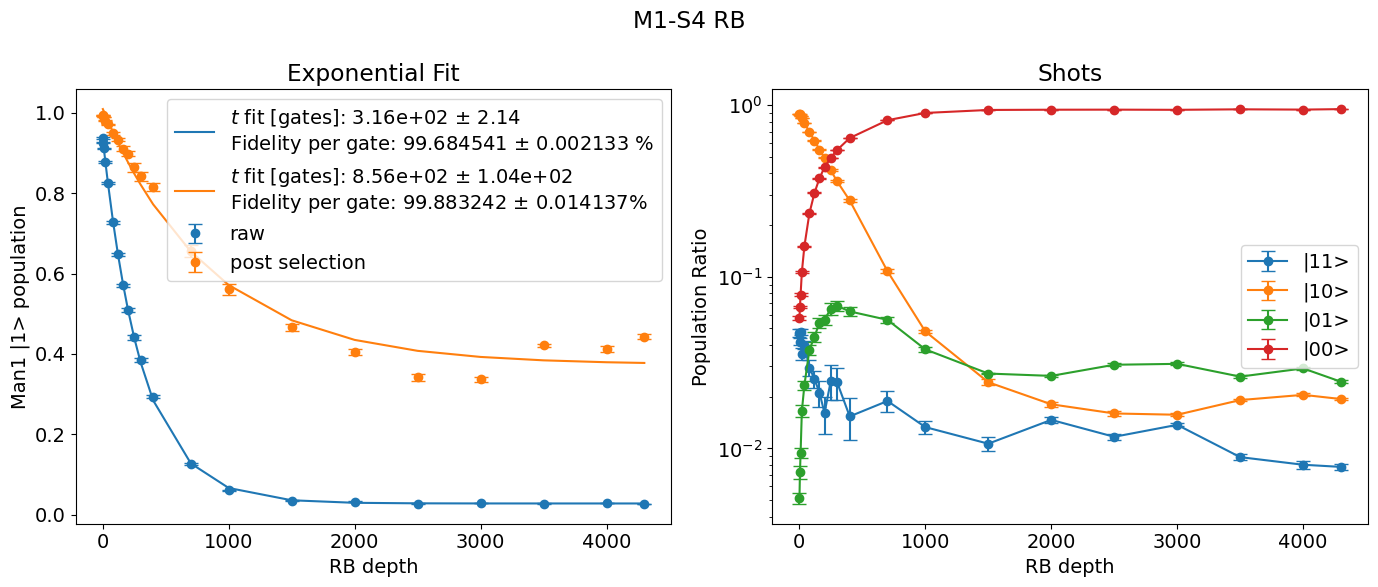

In [18]:
file_list = np.arange(345, 366, 1)
file_list = np.arange(345, 366, 1)
analyis = MM_DualRail_Analysis()
return_args = analyis.show_rb(prev_data = prev_data, expt_path = expt_path, file_list = file_list, name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title = 'M1-S4 RB')
# fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

In [90]:
depth_list = return_args[11]
fids_list = return_args[0]
fids_post_list = return_args[1]
gg_list = return_args[2]
ge_list = return_args[3]
eg_list = return_args[4]
ee_list = return_args[5]

### double exp fitting

Optimal parameters: a = 0.4297208785813148, b = -0.00187854349736062, c = 0.5099999999999999, d = -0.004367762380856155, e = -1.0781619462879754e-31
r1 = 532.327306450457, r1_err = 342.188548956528, r2 = 228.95018382478565, r2_err = 123.04112065678896
r1_fid = 0.9981232198611204, r1_fid_err = 0.001205291634111471, r2_fid = 0.9956417624208488, r2_fid_err = 0.002337068219933681


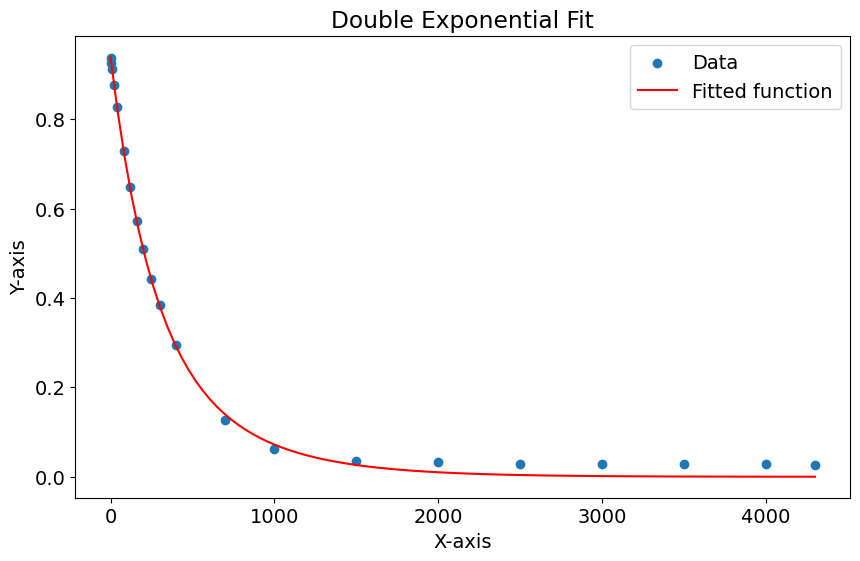

In [91]:
xlist = depth_list
ylist = fids_list
double_exponential_fit(xlist, ylist)

Optimal parameters: a = 0.8895619290905286, b = -0.0027397113995462586, c = 0.053898373248161324
r = 365.0019488058547, r_err = 3.1224459564078306
r_fid = 0.9972640381846889, r_fid_err = 2.3373014166268786e-05


C:\Users\26049\AppData\Local\Temp\ipykernel_7380\2219549172.py:18: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c


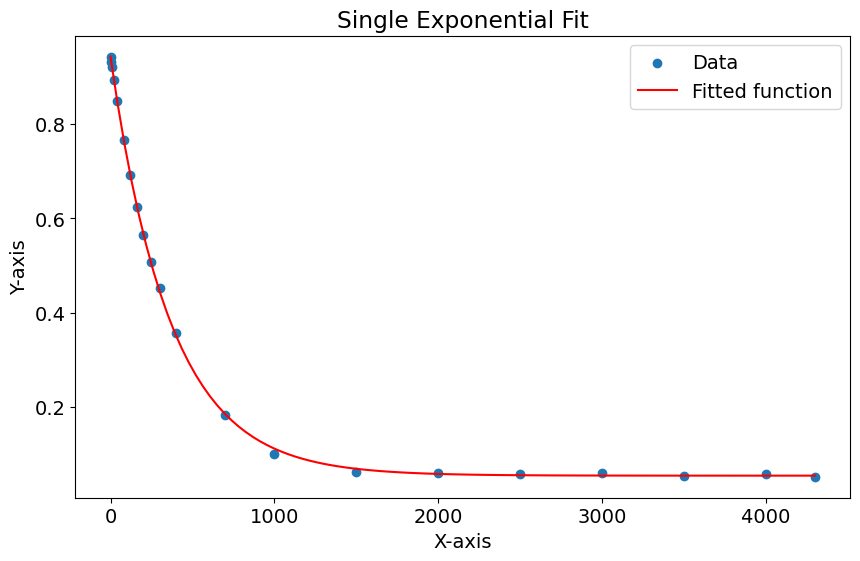

In [92]:
x_data = depth_list
y_data = 1 - np.array(ee_list)
single_exponential_fit(x_data, y_data)

reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after

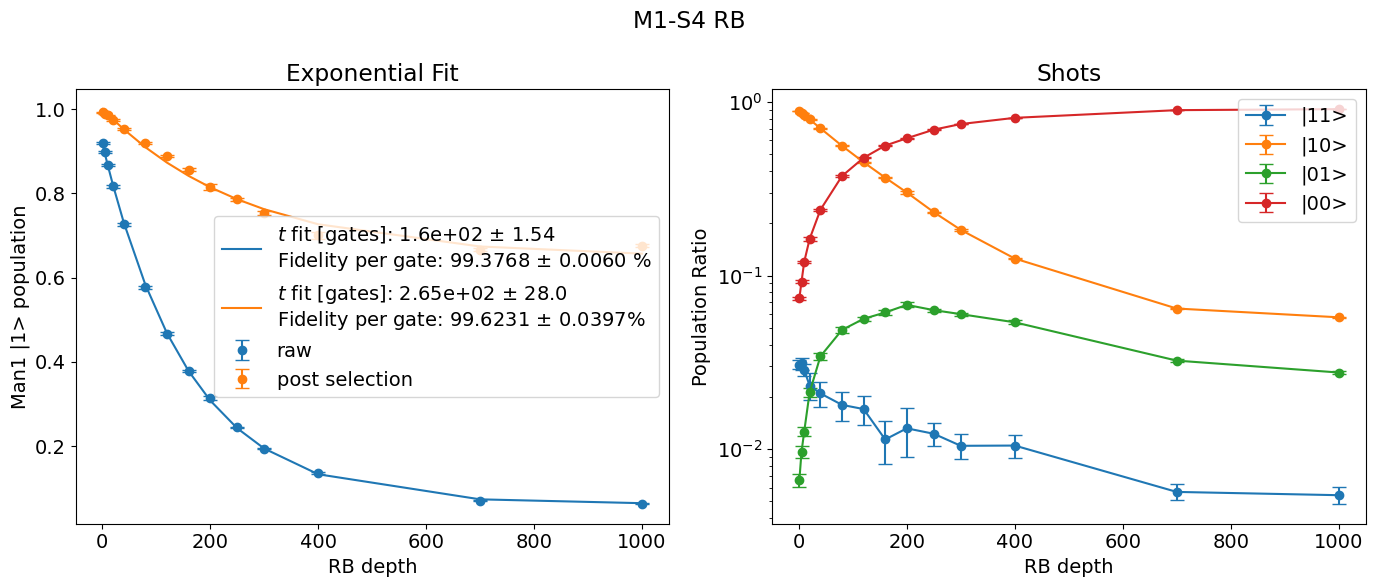

In [408]:
file_list = np.arange(492, 506, 1)
# file_list = np.arange(345, 366, 1)
# file_list = np.arange(345, 366, 1)
return_args = show_rb(prev_data, expt_path, file_list, name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title = 'M1-S4 RB')
fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

### RB Check

In [391]:
temp_data, attrs = prev_data(expt_path, '00518_SingleBeamSplitterRBPostSelection.h5')
avg_readout, avg_readout_post, gg, ge, eg, ee = RB_extract_postselction_excited(temp_data,attrs, active_reset=True)
print(np.average(avg_readout))
print(np.average(avg_readout_post))


reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
975
0.6750049445197057
0.9655804448839695


reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after

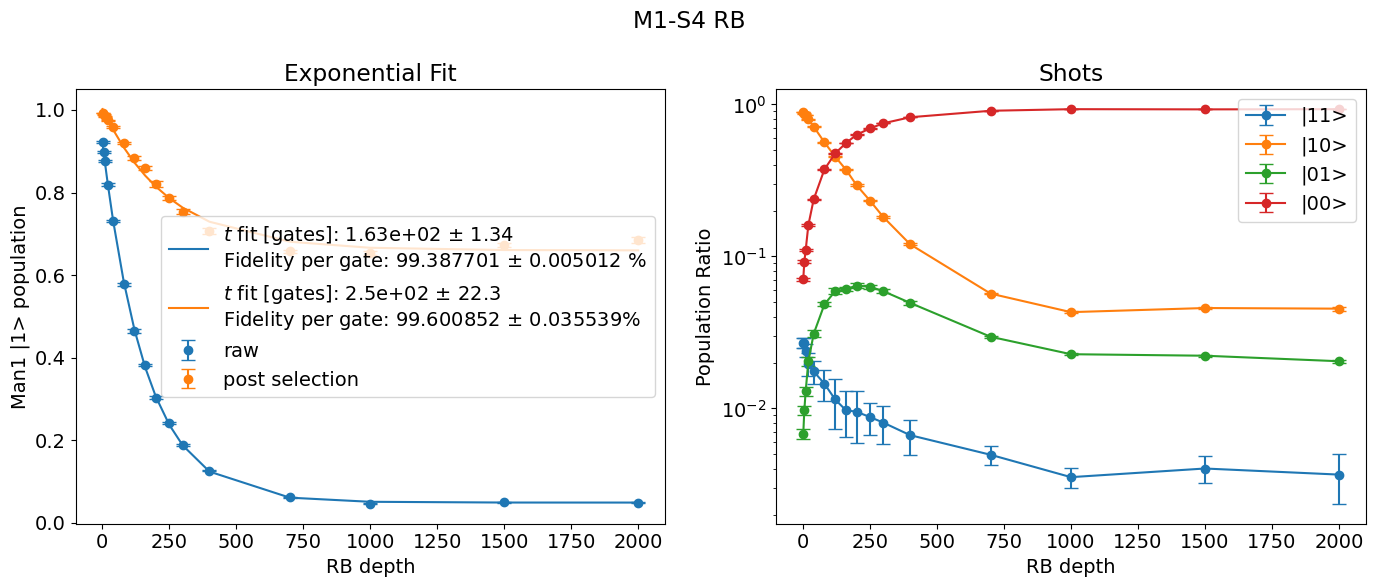

In [447]:
# file_list = np.arange(366, 383, 1)
# file_list = np.arange(611, 632, 1)
file_list = np.arange(611, 627, 1)
return_args = show_rb(prev_data, expt_path, file_list, name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title = 'M1-S4 RB')
fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

In [286]:
fids_list

[0.9241110191340007,
 0.8984509021132537,
 0.8624423127191593,
 0.8108836264472166,
 0.6808796959808068,
 0.5276243116849477,
 0.43897178621558797,
 0.30035225090027284,
 0.2686917731451151,
 0.2163378473720695,
 0.16128942658179707,
 0.10610294643177201,
 0.04752239737690638,
 0.03970477671525186,
 0.030397992119795533,
 0.02722606707152014,
 0.025026992802712682]

In [288]:
fids_post_list

[0.9886214757494748,
 0.9816691343746241,
 0.9681525682701364,
 0.9565484480267671,
 0.8956378283692882,
 0.8338490212554759,
 0.8270860987117578,
 0.6719000916588044,
 0.721106542188652,
 0.7056367916165432,
 0.6403507518288409,
 0.5832502828393226,
 0.5380310791594038,
 0.5269488724566773,
 0.5037338752587112,
 0.45448878636328244,
 0.45643265390432386]

In [287]:
xlist

[1,
 5,
 10,
 20,
 40,
 80,
 120,
 160,
 200,
 250,
 300,
 400,
 700,
 1000,
 1500,
 2000,
 2500]

## M1-S5

955.0269388827363
956.0277508673225
937.0281091172312
959.0306025468833
1870.0662891137413
1893.0761841876956
2843.129139487447
2898.1441213400503
2917.147939068129
2938.160723618473
4882.275552572472
4881.28613352531
9708.593136134485
9726.595862430995


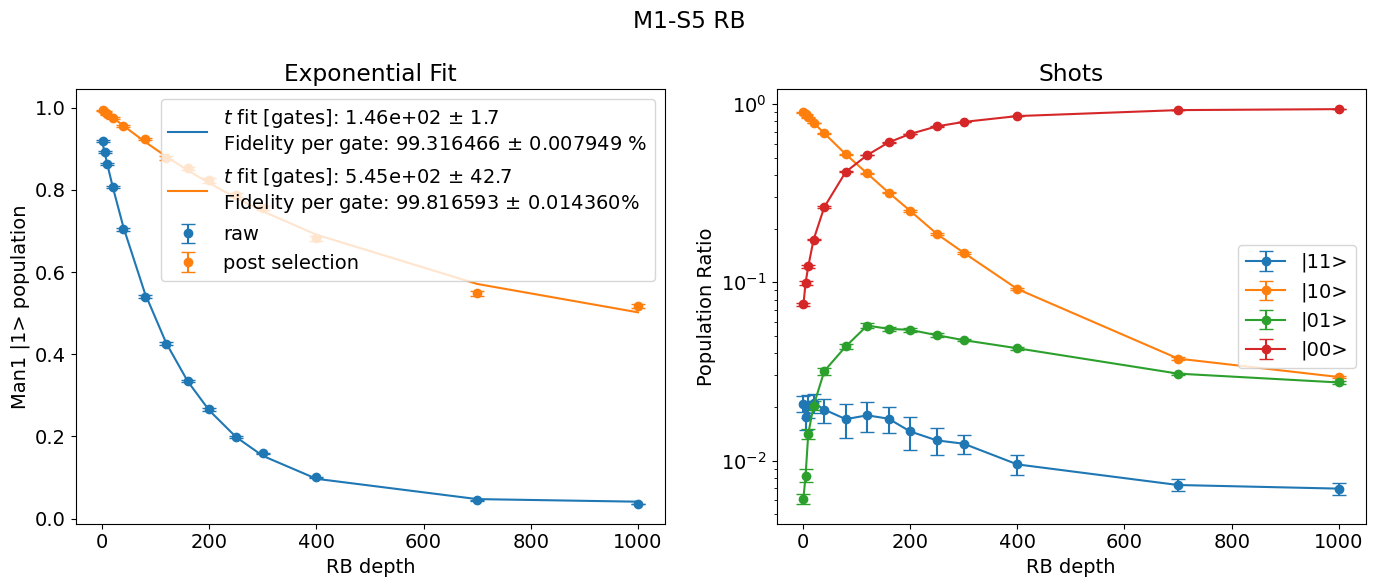

ValueError: too many values to unpack (expected 14)

In [83]:

file_list = np.arange(506, 520, 1)
analysis = MM_DualRail_Analysis()
return_args = analysis.show_rb(prev_data, expt_path, file_list, name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title = 'M1-S5 RB')
fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

In [84]:
fids_list = return_args[0]
fids_post_list = return_args[1]
gg_list = return_args[2]
ge_list = return_args[3]
eg_list = return_args[4]
ee_list = return_args[5]
gg_list_err = return_args[6]
ge_list_err = return_args[7]
eg_list_err = return_args[8]
ee_list_err = return_args[9]
xlist = return_args[10]
depth_list = return_args[11]


### Double exponential fitting

Optimal parameters: a = 0.6099999999999999, b = -0.009194759674701678, c = 0.31613036198941025, d = -0.0030832817676381464, e = -8.58449193317525e-18
r1 = 108.75760056582934, r1_err = 27.741110563782687, r2 = 324.32974841803684, r2_err = 253.30987822631397
r1_fid = 0.9908473828656177, r1_fid_err = 0.0023238675673156093, r2_fid = 0.9969214666640865, r2_fid_err = 0.0024007089055272674


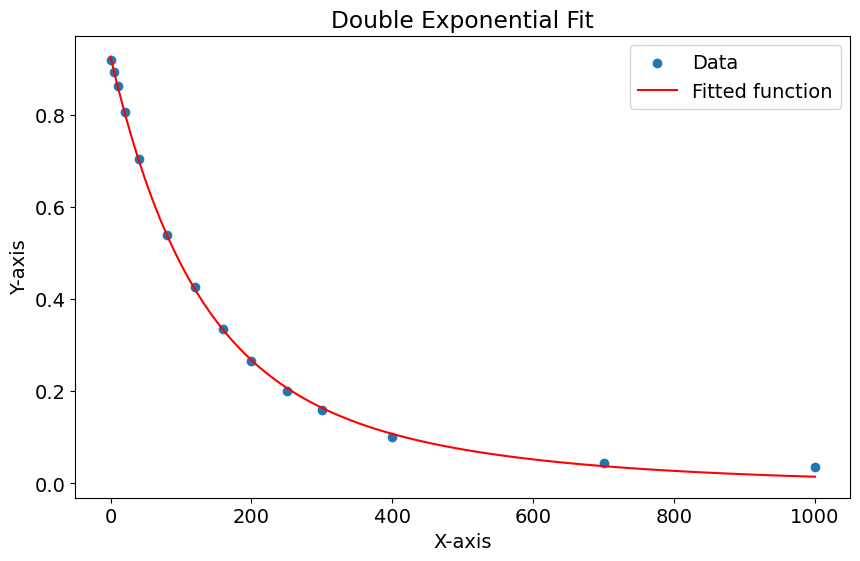

In [85]:
xlist = depth_list
ylist = fids_list
double_exponential_fit(xlist, ylist)

Optimal parameters: a = 0.8611728937793451, b = -0.0061053402087884075, c = 0.06492734996691617
r = 163.79103633906226, r_err = 1.6854478498939247
r_fid = 0.9939132595089585, r_fid_err = 6.24429686836602e-05


C:\Users\26049\AppData\Local\Temp\ipykernel_7380\2219549172.py:18: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c


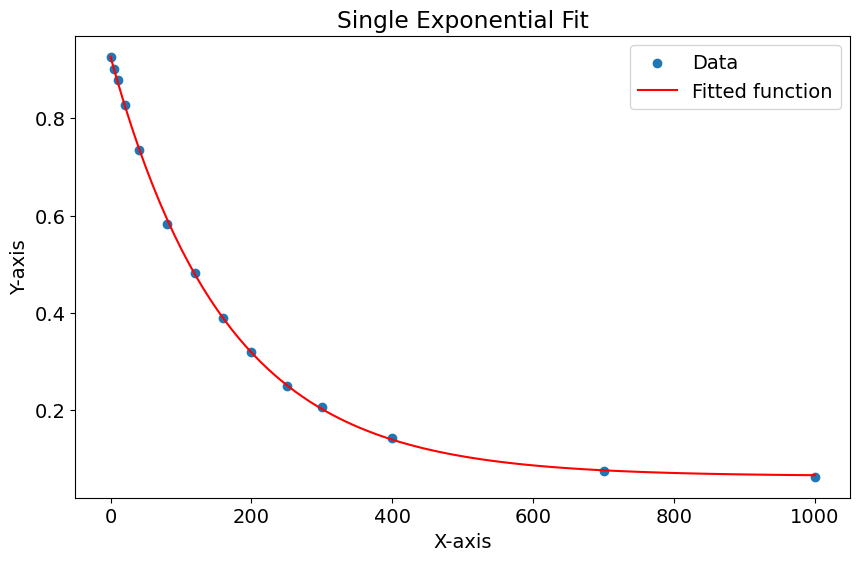

In [81]:
xlist = depth_list
ylist = 1 - np.array(ee_list)
single_exponential_fit(xlist, ylist)

### RB Check

reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after

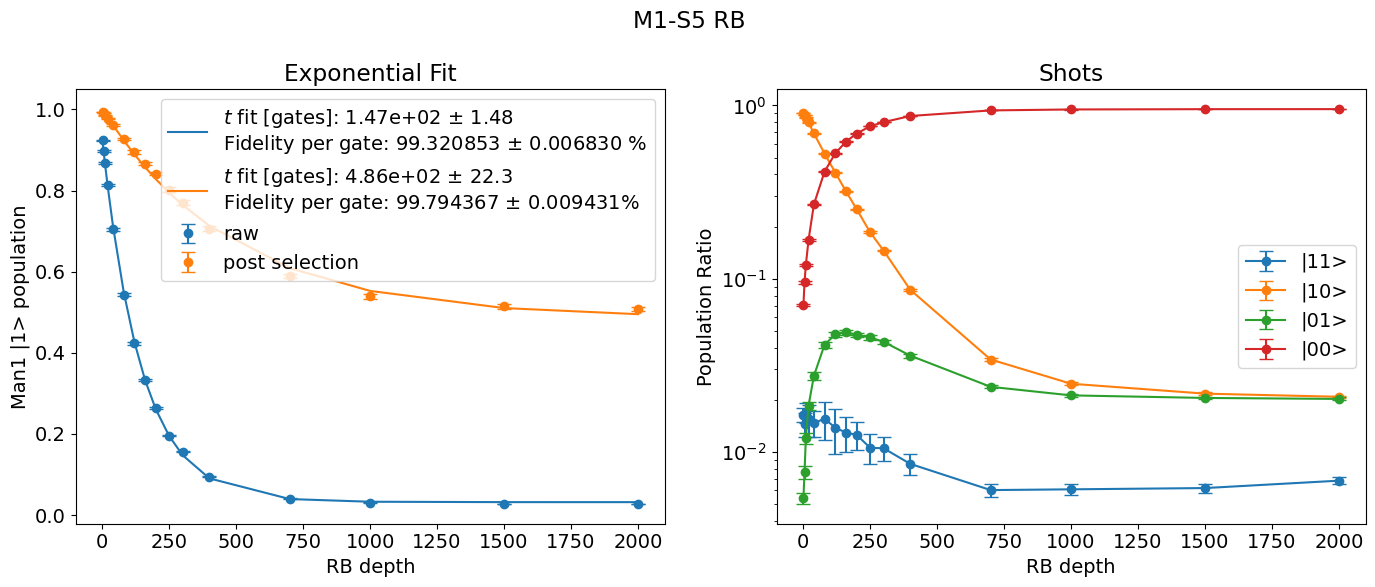

In [449]:

# file_list = np.arange(506, 520, 1)
# file_list = np.arange(632, 653, 1)
file_list = np.arange(632, 648, 1)
return_args = show_rb(prev_data, expt_path, file_list, name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title = 'M1-S5 RB')
fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

## M1-S6

reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after

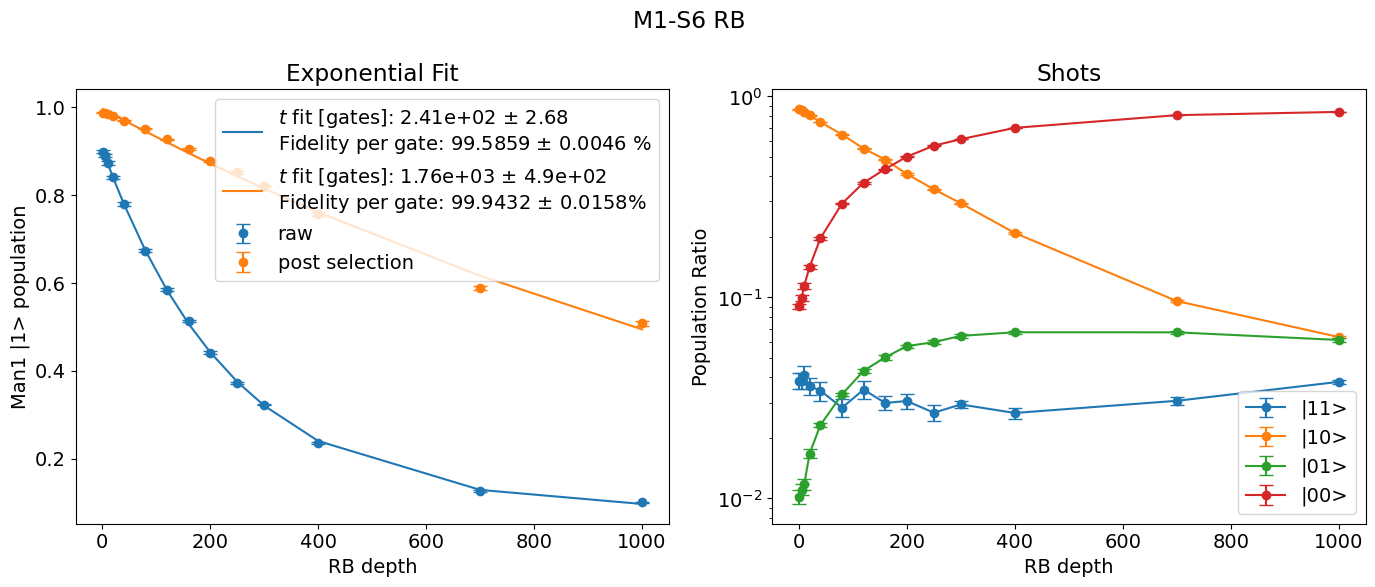

In [416]:
file_list = np.arange(520, 534, 1)
# file_list = np.arange(408, 429, 1)
# file_list = np.arange(366, 387, 1)
return_args = show_rb(prev_data, expt_path, file_list, name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title = 'M1-S6 RB')
fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

### RB Check

reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after

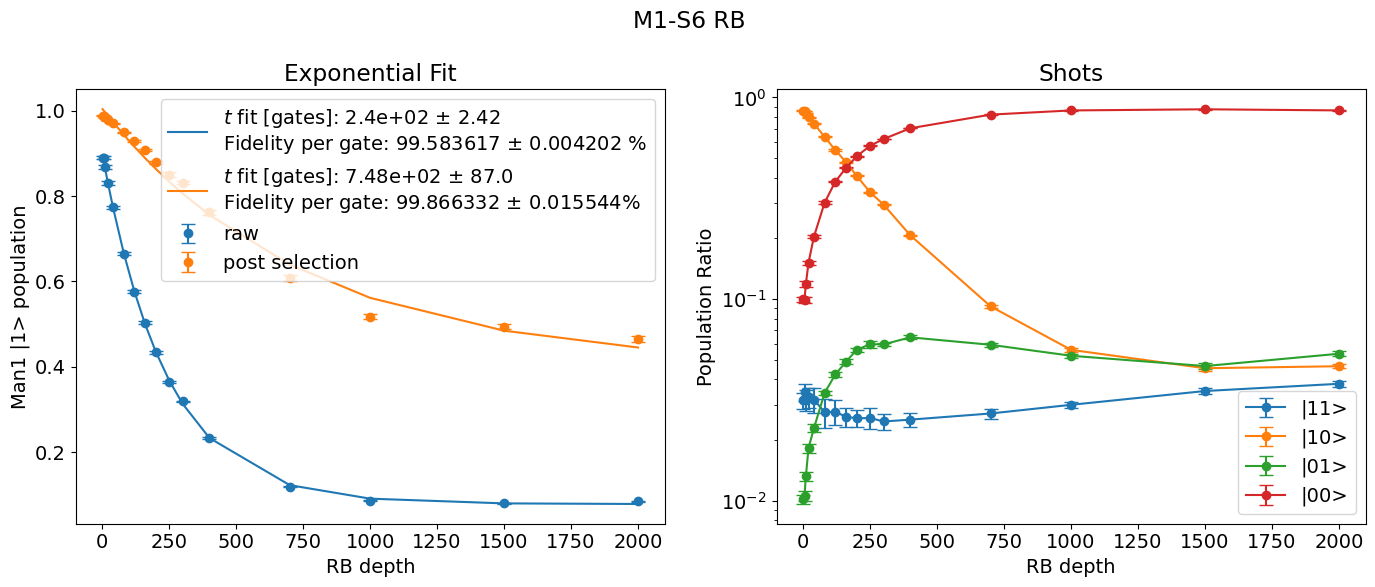

In [450]:
# file_list = np.arange(520, 534, 1)
# file_list = np.arange(653, 674, 1)
file_list = np.arange(653, 669, 1)
return_args = show_rb(prev_data, expt_path, file_list, name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title = 'M1-S6 RB')
fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

## M1-S7

reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after

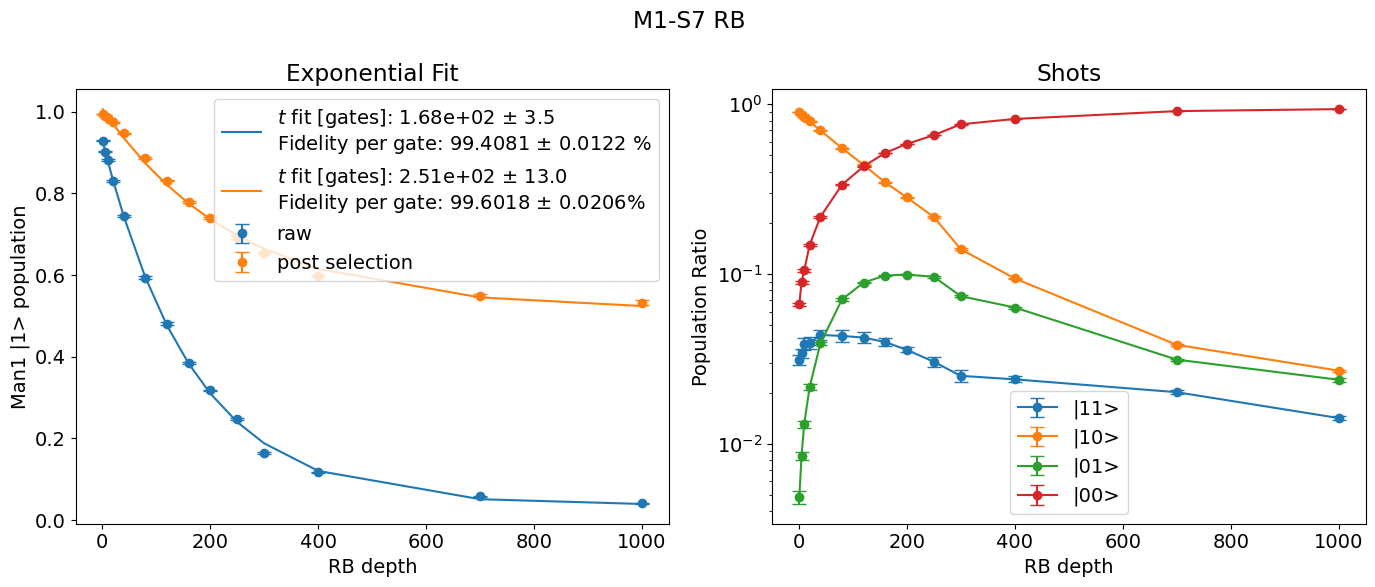

In [418]:
file_list = np.arange(534, 548, 1)
# file_list = np.arange(408, 429, 1)
# file_list = np.arange(366, 387, 1)
return_args = show_rb(prev_data, expt_path, file_list, name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title = 'M1-S7 RB')
fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

### Sideband Sweeep

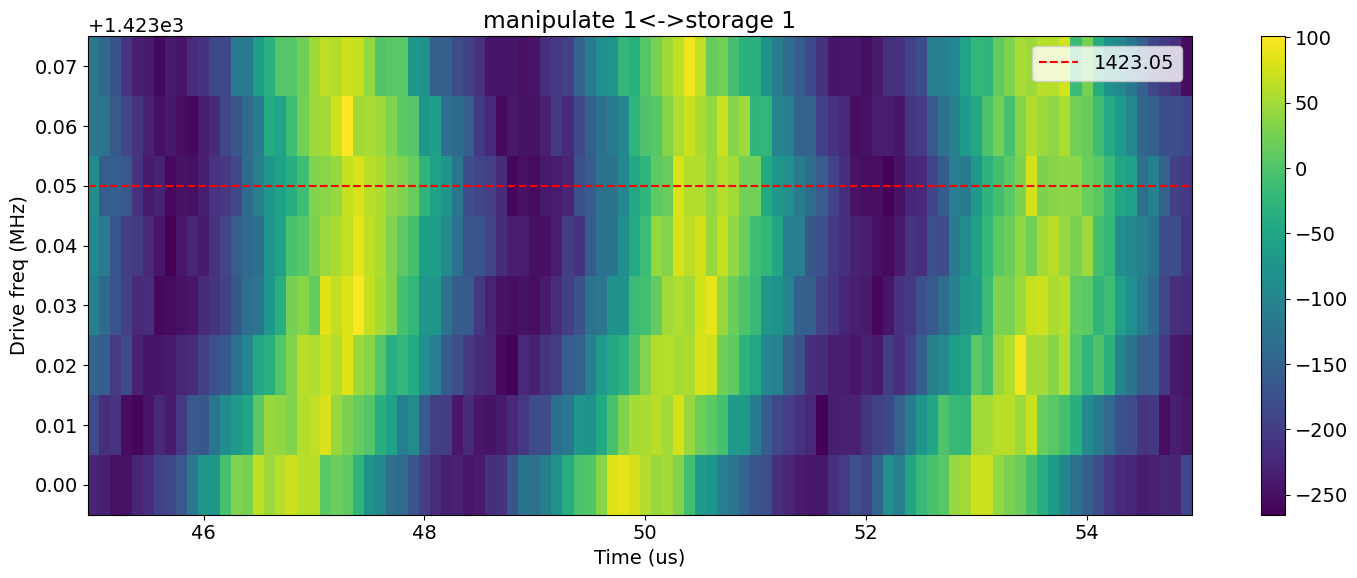

In [342]:
file_list = np.arange(4247,4255,1)
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['idata']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[1423.05], vlines=None, active_reset=True, readout_per_round=4, threshold=-31, title="manipulate 1<->storage 1")
    

[238.34409925   0.30744755  95.05179267 113.09872386 -30.61770224
  -2.90741279]
Decay from avgi [us] 113.0987238633043
Rate [MHz] 0.30744754809300767
Pi length from avgi data [us]: 1.5806508967492494
	Pi/2 length from avgi data [us]: 0.7675040638970613
Fit params:  [238.34409925   0.30744755  95.05179267 113.09872386 -30.61770224
  -2.90741279]

Decay from avgq [us] 113.0987238633043
Rate [MHz] 0.30744754809300767
Pi length from avgq data [us]: 1.5806508967492494
Pi/2 length from avgq data [us]: 0.7903254483746247
Fit params:  [238.34409925   0.30744755  95.05179267 113.09872386 -30.61770224
  -2.90741279]


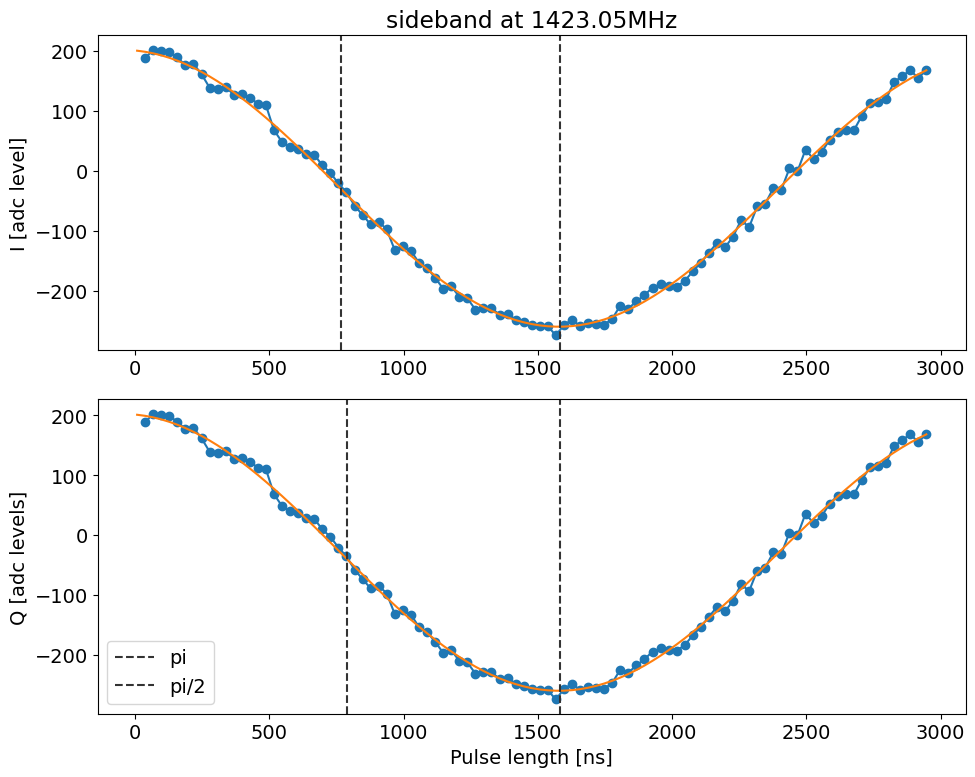

[192.26247253816848,
 187.809766343593,
 202.2559044331196,
 199.8096870801612,
 197.76178972870946,
 189.1775745576385,
 176.09583781399067,
 178.67433472710658,
 161.22519899455384,
 138.9441433030489,
 136.13831306114605,
 140.13567387548073,
 127.15546925841043,
 128.77931687762555,
 122.33888158255246,
 112.1540182861536,
 109.47489638021553,
 67.87530438311688,
 48.14237012987012,
 39.97543966450216,
 36.11466416183397,
 27.818020532383382,
 26.958527958527956,
 9.318879524730589,
 -3.1995960515068798,
 -20.87158648479403,
 -35.652966668524606,
 -57.66615816615817,
 -73.62099430967356,
 -89.14066040342635,
 -84.47940553170679,
 -97.57115182115183,
 -132.160991114149,
 -124.97653390450886,
 -132.9360119047619,
 -153.2813715820045,
 -161.57548024891776,
 -177.91783531594456,
 -196.27985926207685,
 -192.01117045793453,
 -209.64640151515152,
 -212.17263606414548,
 -231.09848712212155,
 -228.73759376399465,
 -228.55514012303487,
 -239.7221198156682,
 -237.8383020581114,
 -247.85482853

In [344]:
temp_data, attrs = prev_data(expt_path, '04252_sideband_general_sweep.h5')
temp_data, attrs = prev_data(expt_path, '00142_SidebandGeneralExperiment.h5')
length_rabi_display(temp_data, fit=True, fitparams=None, title='sideband at '+str(attrs['config']['expt']['flux_drive'][1])+'MHz', 
                    active_reset=True, readout_per_round=4, threshold=-39)

### Post Selection

gg 30
ge 821
eg 3
ee 73
gg 36
ge 817
eg 10
ee 68
gg 18
ge 857
eg 5
ee 71
gg 36
ge 843
eg 5
ee 75
gg 28
ge 862
eg 10
ee 55
gg 33
ge 837
eg 6
ee 73
gg 34
ge 831
eg 11
ee 66
gg 32
ge 824
eg 8
ee 76
gg 47
ge 823
eg 5
ee 65
gg 34
ge 849
eg 7
ee 56
gg 39
ge 850
eg 2
ee 70
gg 38
ge 838
eg 4
ee 75
gg 39
ge 844
eg 8
ee 55
gg 44
ge 856
eg 4
ee 52
gg 37
ge 850
eg 2
ee 68
gg 31
ge 837
eg 11
ee 81
gg 32
ge 873
eg 6
ee 48
gg 25
ge 841
eg 11
ee 68
gg 35
ge 827
eg 5
ee 79
gg 36
ge 835
eg 6
ee 72
gg 30
ge 817
eg 4
ee 104
gg 41
ge 836
eg 3
ee 60
gg 35
ge 847
eg 6
ee 64
gg 30
ge 842
eg 7
ee 65
gg 39
ge 836
eg 4
ee 74
gg 39
ge 862
eg 4
ee 59
gg 36
ge 842
eg 8
ee 72
gg 35
ge 853
eg 5
ee 61
gg 41
ge 849
eg 7
ee 66
gg 37
ge 863
eg 9
ee 55
964.0261238003402
gg 38
ge 796
eg 16
ee 95
gg 33
ge 793
eg 12
ee 93
gg 51
ge 812
eg 11
ee 89
gg 31
ge 827
eg 15
ee 78
gg 39
ge 813
eg 3
ee 97
gg 35
ge 819
eg 5
ee 95
gg 49
ge 794
eg 14
ee 90
gg 44
ge 799
eg 14
ee 81
gg 43
ge 796
eg 10
ee 94
gg 41
ge 776
eg 12
ee 96
gg 42
ge

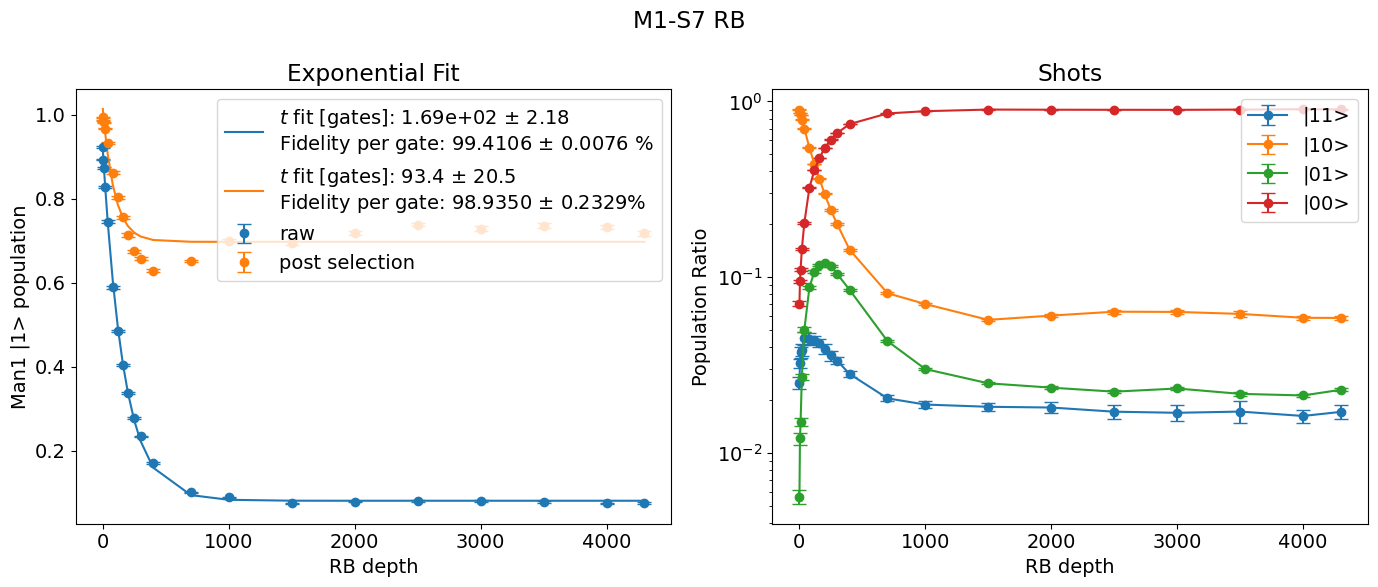

In [277]:
file_list = np.arange(429, 450, 1)
# file_list = np.arange(366, 387, 1)
return_args = show_rb(prev_data, expt_path, file_list, name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title = 'M1-S7 RB')
fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

### RB Check

reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after_first_meas
reset_qubit_via_active_reset_after

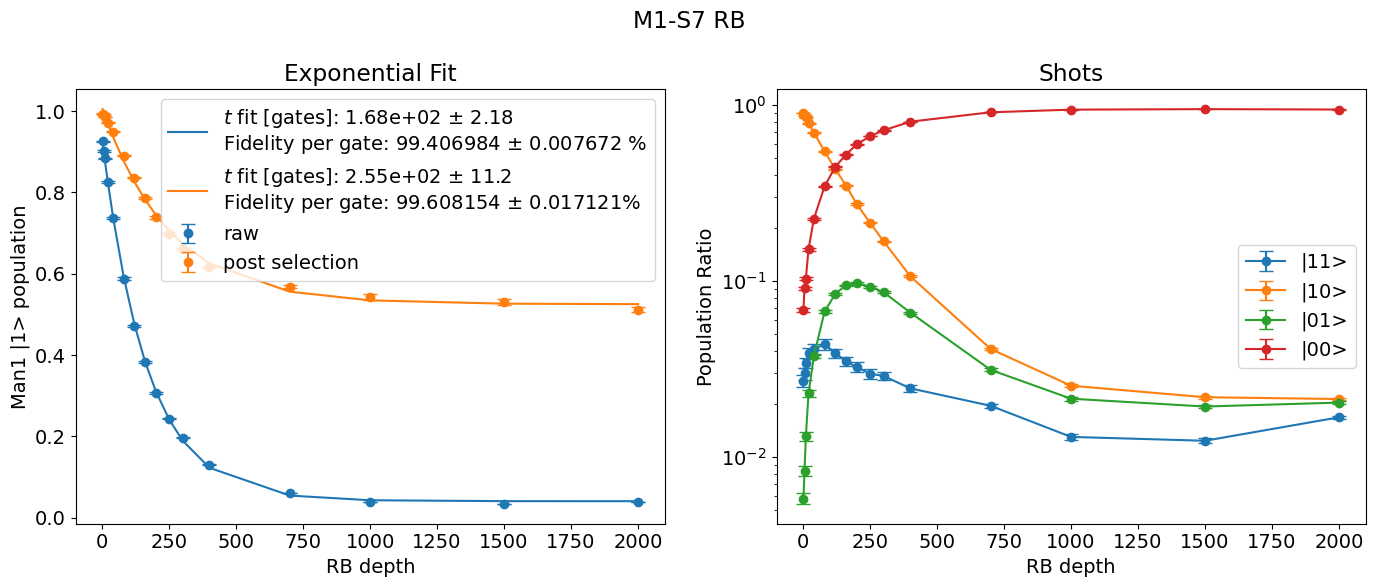

In [451]:
# file_list = np.arange(674, 695, 1)
file_list = np.arange(674, 690, 1)
return_args = show_rb(prev_data, expt_path, file_list, name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title = 'M1-S7 RB')
fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

# Save Data 

In [64]:
import numpy as np
import pandas as pd

depth_list = [1, 5, 10, 20, 40, 80, 120, 160, 200, 250,
     300, 400, 700, 1000 , 1500, 2000, 2500, 3000, 3500, 4000, 4300]

mode_list = [1, 2,3,4,5,6,7]


file_list_start_no = 548
curr_file_no = file_list_start_no
name = '_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5'

# Initialize an empty list to store the data
data = []



for idx, mode in enumerate(mode_list):

    file_list = np.arange(curr_file_no, curr_file_no + len(depth_list))
    curr_file_no = curr_file_no + len(depth_list) #* prepulse_vars_list[idx]
    
    # Append the data to the list
    data.append({
        'Mode': mode,
        'file_list': file_list.tolist(),  # Convert numpy array to list
        'name': name
    })

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   Mode                                          file_list  \
0     1  [548, 549, 550, 551, 552, 553, 554, 555, 556, ...   
1     2  [569, 570, 571, 572, 573, 574, 575, 576, 577, ...   
2     3  [590, 591, 592, 593, 594, 595, 596, 597, 598, ...   
3     4  [611, 612, 613, 614, 615, 616, 617, 618, 619, ...   
4     5  [632, 633, 634, 635, 636, 637, 638, 639, 640, ...   
5     6  [653, 654, 655, 656, 657, 658, 659, 660, 661, ...   
6     7  [674, 675, 676, 677, 678, 679, 680, 681, 682, ...   

                                                name  
0  _SingleBeamSplitterRBPostSelection_sweep_depth...  
1  _SingleBeamSplitterRBPostSelection_sweep_depth...  
2  _SingleBeamSplitterRBPostSelection_sweep_depth...  
3  _SingleBeamSplitterRBPostSelection_sweep_depth...  
4  _SingleBeamSplitterRBPostSelection_sweep_depth...  
5  _SingleBeamSplitterRBPostSelection_sweep_depth...  
6  _SingleBeamSplitterRBPostSelection_sweep_depth...  


In [65]:
depth_list[:-5]

[1, 5, 10, 20, 40, 80, 120, 160, 200, 250, 300, 400, 700, 1000, 1500, 2000]

982.0265208465921
975.0273426866435
971.0275506318246
972.0297745004019
1913.0587282249976
1953.070493975179
2940.108727211348
2939.1136192742847
2917.132188726476
2927.130036736574
4889.226647273255
4891.26170532596
9750.576730623528
9786.585225956327
9766.596897364616
9791.61275878213
9741.608801351844
9779.611829665193
9798.613526398565
9747.607980803115
9775.61332927004


C:\_Lib\python\multimode_expts\experiments\fitting.py:55: RuntimeWarning: overflow encountered in exp
  return y0 + yscale*np.exp(-(x-x0)/decay)


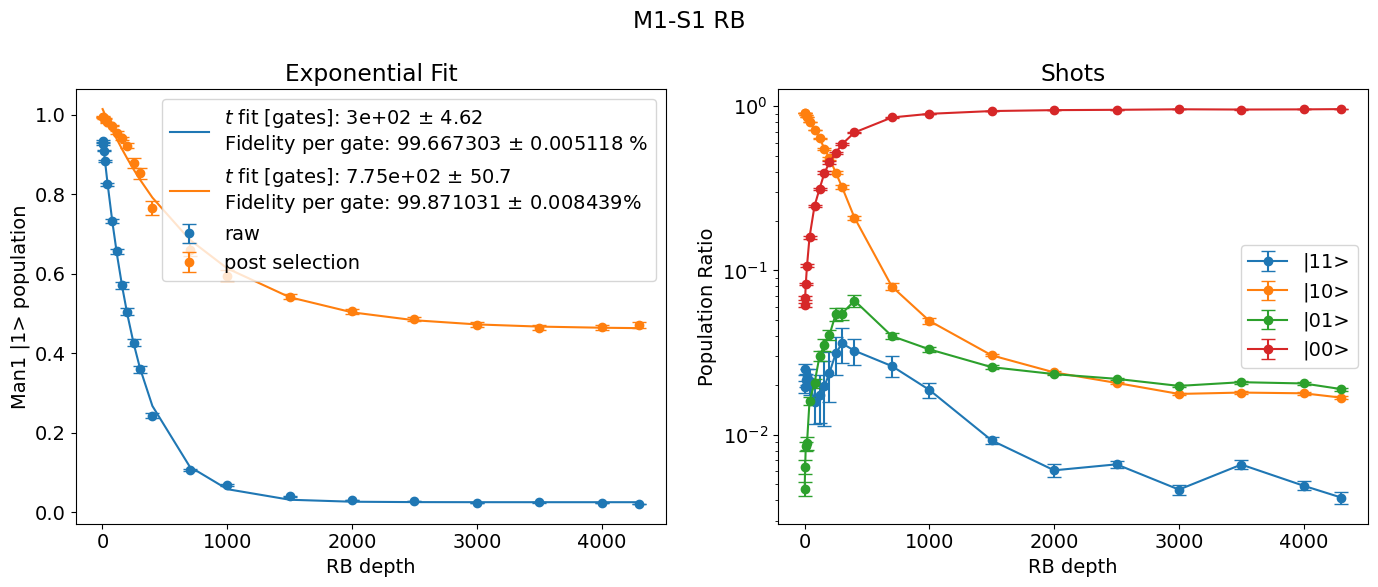

982.0265208465921
975.0273426866435
971.0275506318246
972.0297745004019
1913.0587282249976
1953.070493975179
2940.108727211348
2939.1136192742847
2917.132188726476
2927.130036736574
4889.226647273255
4891.26170532596
9750.576730623528
9786.585225956327
9766.596897364616
9791.61275878213


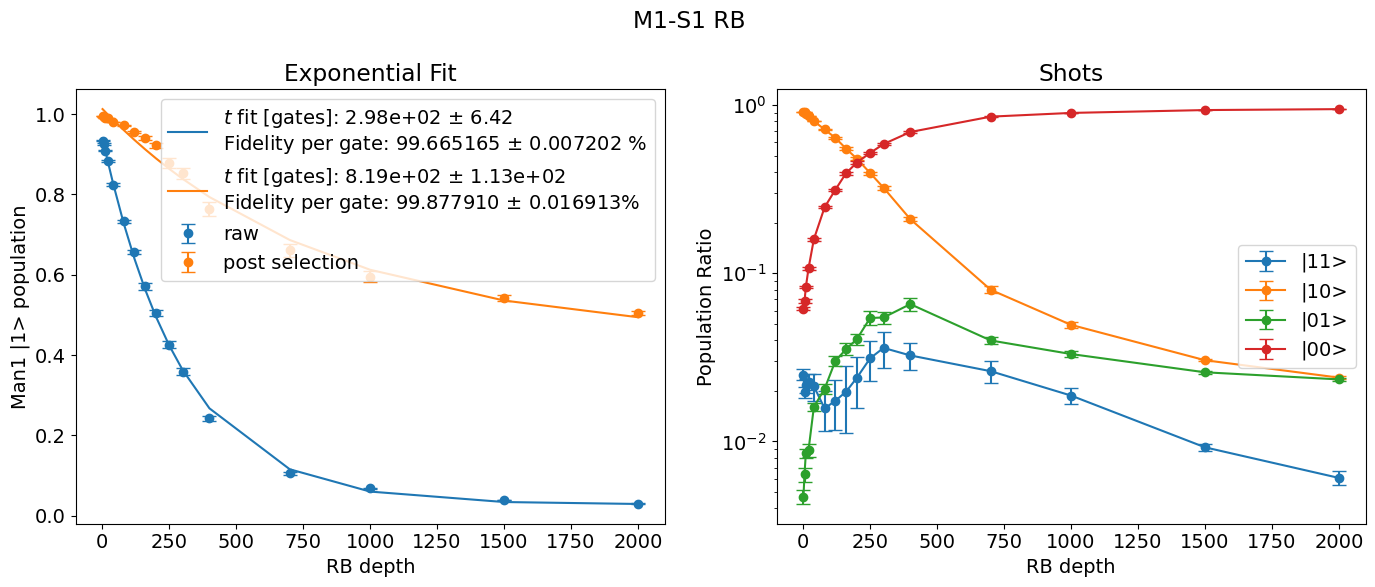

962.0263490055412
977.0264325117315
977.0269407591394
979.0279701020672
1958.0592903826428
1940.0637713546623
2936.1066874090243
2950.11495337442
2931.1153160362364
2932.123469446977
4871.2134281870285
4892.236073671104
9754.534394893453
9782.567887861445
9786.599924866452
9774.608096886244
9599.587233559898
9554.58713604738
9604.586636027172
9730.604821330357
9691.602558446724


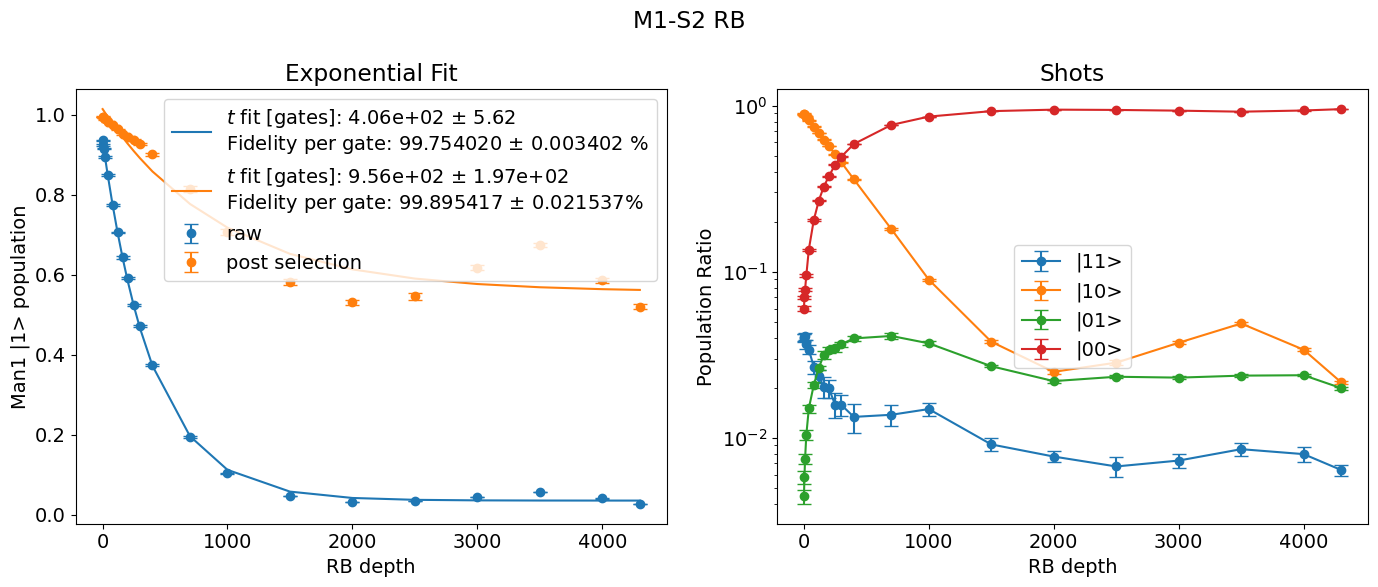

962.0263490055412
977.0264325117315
977.0269407591394
979.0279701020672
1958.0592903826428
1940.0637713546623
2936.1066874090243
2950.11495337442
2931.1153160362364
2932.123469446977
4871.2134281870285
4892.236073671104
9754.534394893453
9782.567887861445
9786.599924866452
9774.608096886244


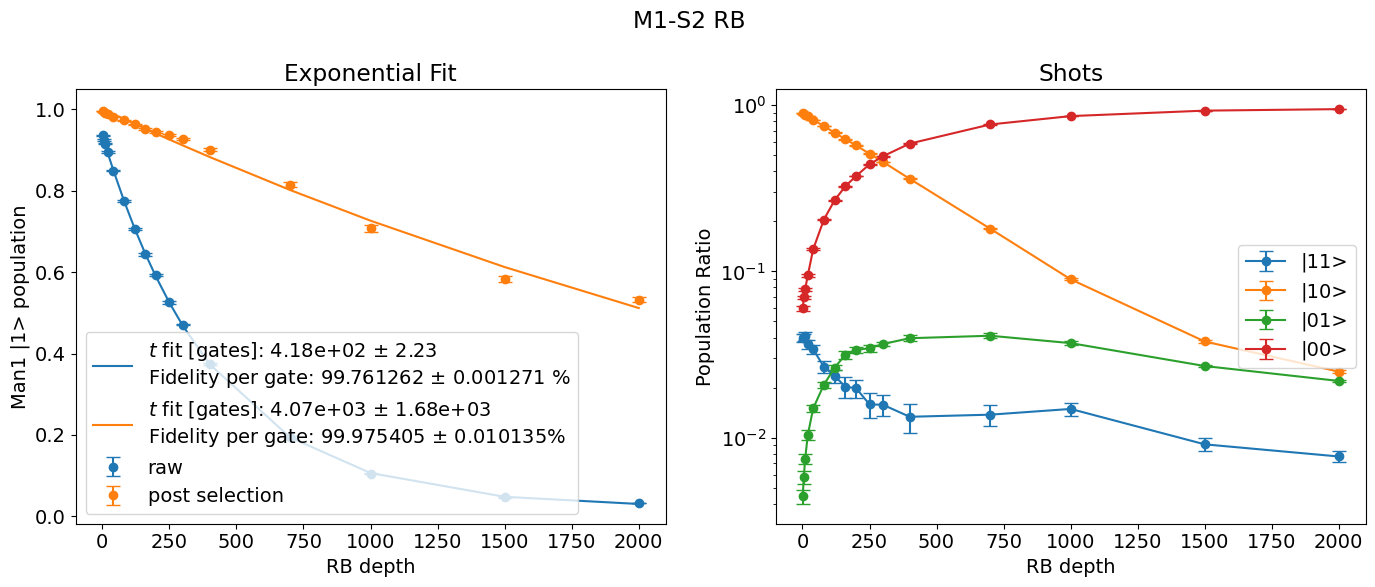

973.0259848035796
981.0269783505635
971.0269774791141
963.0277457125907
1936.0591848495822
1932.0655153663372
2915.107133292471
2908.1136586986627
2909.1241349527054
2910.1284119780285
4877.22783651303
4863.244743374204
9816.56252326398
9718.582310813576
9678.598129639848
9698.604586294203
9755.612014454511
9713.604981322265
9639.600339602359
9676.606176160367
9755.610634954652


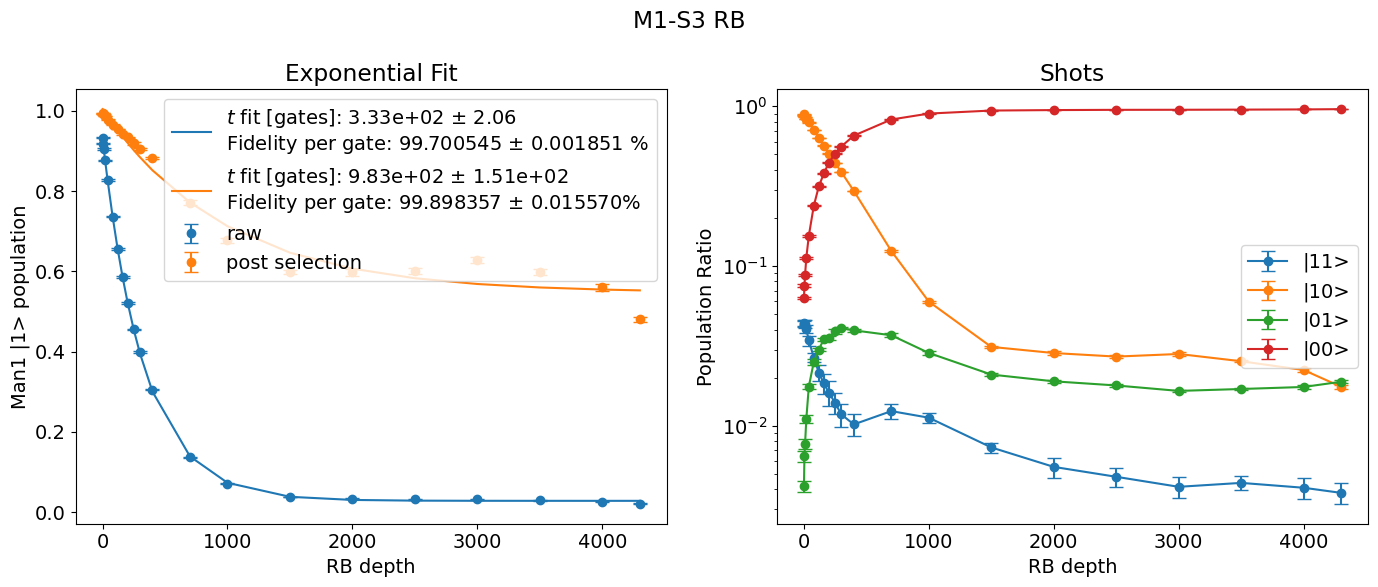

973.0259848035796
981.0269783505635
971.0269774791141
963.0277457125907
1936.0591848495822
1932.0655153663372
2915.107133292471
2908.1136586986627
2909.1241349527054
2910.1284119780285
4877.22783651303
4863.244743374204
9816.56252326398
9718.582310813576
9678.598129639848
9698.604586294203


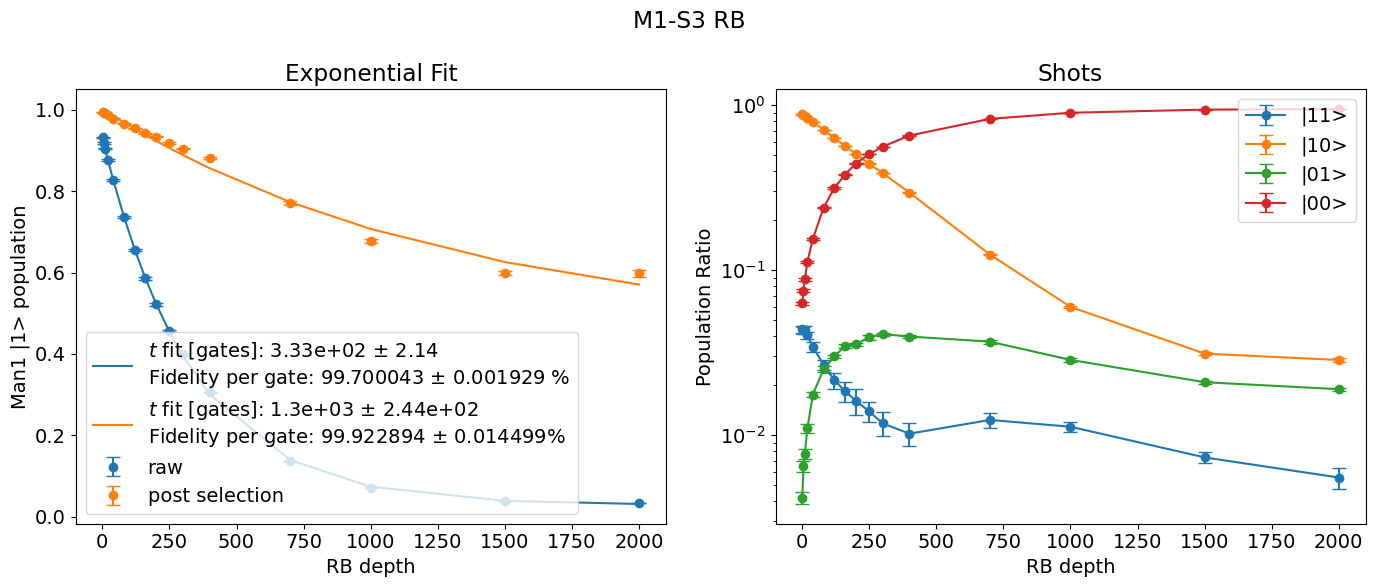

970.0265246700392
971.0277550353196
974.0289178305529
976.0300244166319
1927.0665524891024
1938.0787449260065
2903.127272632038
2908.132083471214
2904.1452282878136
2898.1518685405445
4858.264284130962
4848.277460790453
9595.583539195486
9567.588038257056
9528.58450412353
9623.600543002396
9716.606067343151
9475.58431180369
9713.604494140847
9687.608467926895
9746.613032925326


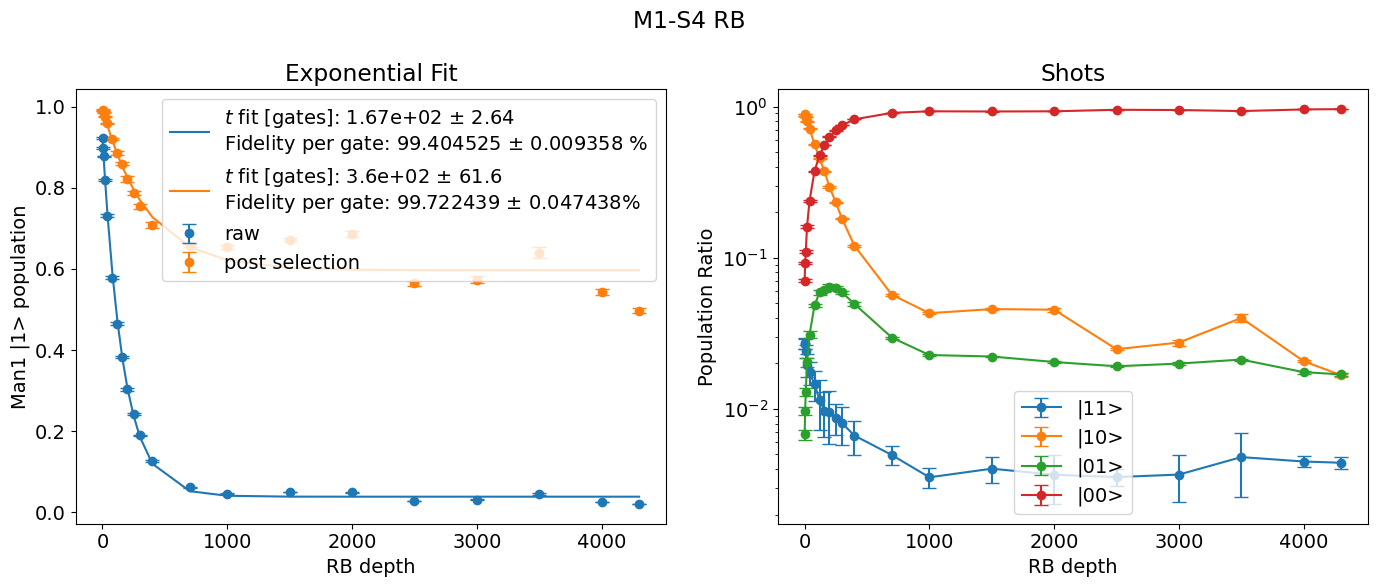

970.0265246700392
971.0277550353196
974.0289178305529
976.0300244166319
1927.0665524891024
1938.0787449260065
2903.127272632038
2908.132083471214
2904.1452282878136
2898.1518685405445
4858.264284130962
4848.277460790453
9595.583539195486
9567.588038257056
9528.58450412353
9623.600543002396


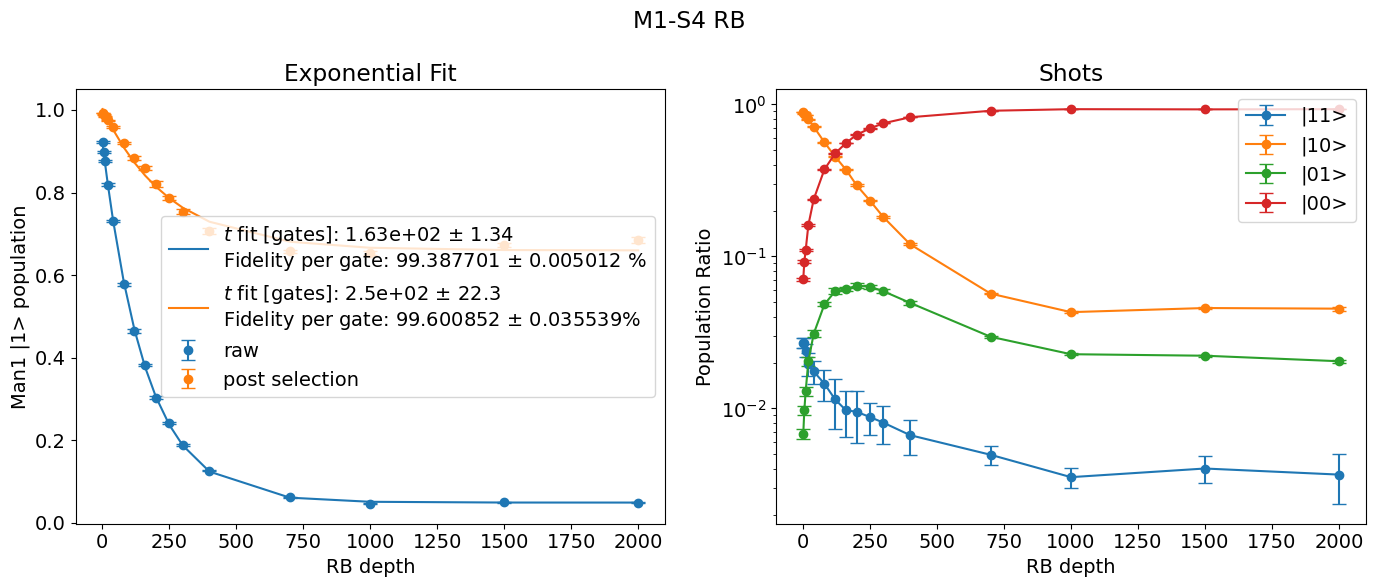

971.0274016509734
970.0288525625667
974.0294664042412
962.0307896162302
1924.0686290830308
1949.0819550738768
2877.132009738068
2922.1440221912576
2909.149423799937
2913.1606237190294
4873.273936439079
4872.289134208422
9660.594497298838
9720.604978314888
9709.604237887179
9767.60787509756
9742.608575841514
9730.60796071562
9764.607893746075
9723.606933984513
9608.595702522665


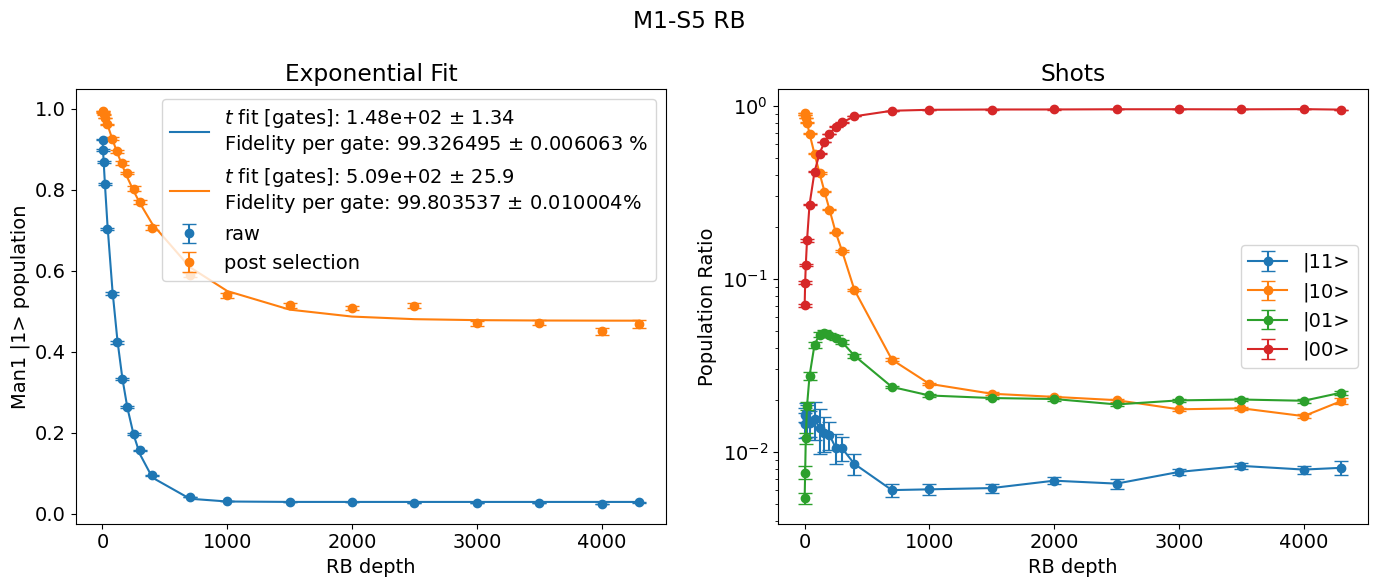

971.0274016509734
970.0288525625667
974.0294664042412
962.0307896162302
1924.0686290830308
1949.0819550738768
2877.132009738068
2922.1440221912576
2909.149423799937
2913.1606237190294
4873.273936439079
4872.289134208422
9660.594497298838
9720.604978314888
9709.604237887179
9767.60787509756


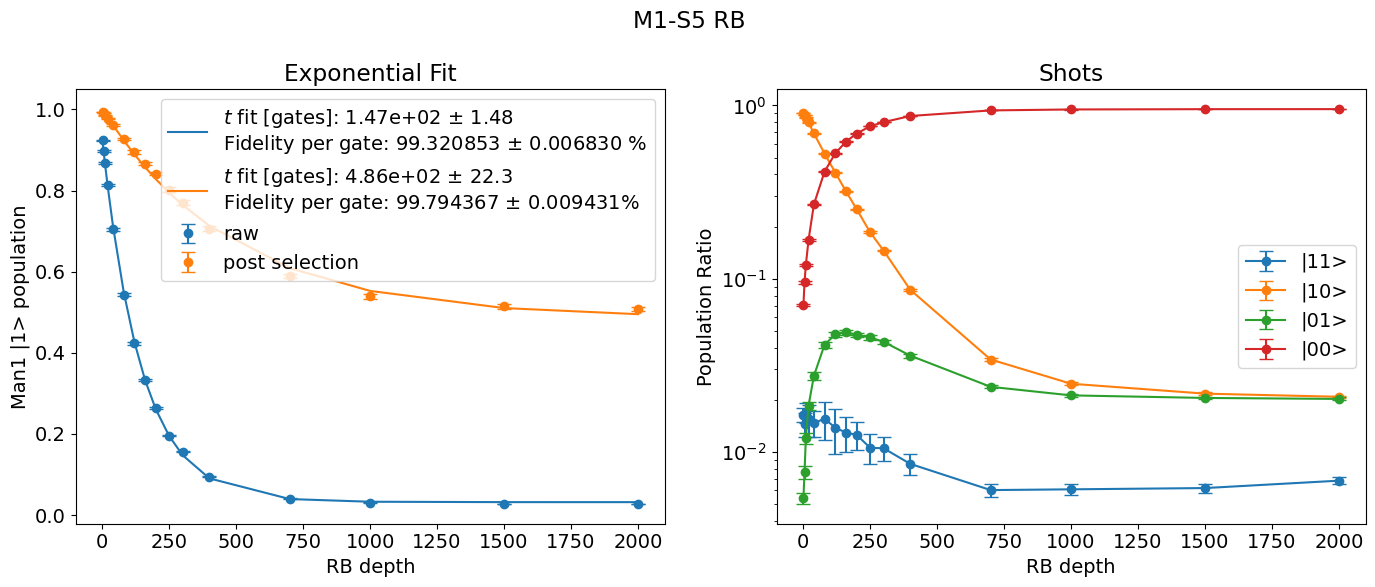

961.028351952544
968.0276446754301
955.027681058263
964.0291384242245
1919.0618470540383
1923.0711715898676
2913.11381606502
2903.123007551115
2913.127063118788
2881.130970055568
4812.234466118228
4789.254186186237
9677.553488615456
9703.56397125773
9707.568237074465
9652.554936434546
9607.557831499951
9654.54463028884
9684.553368014802
9687.539418702538
9726.54989237767


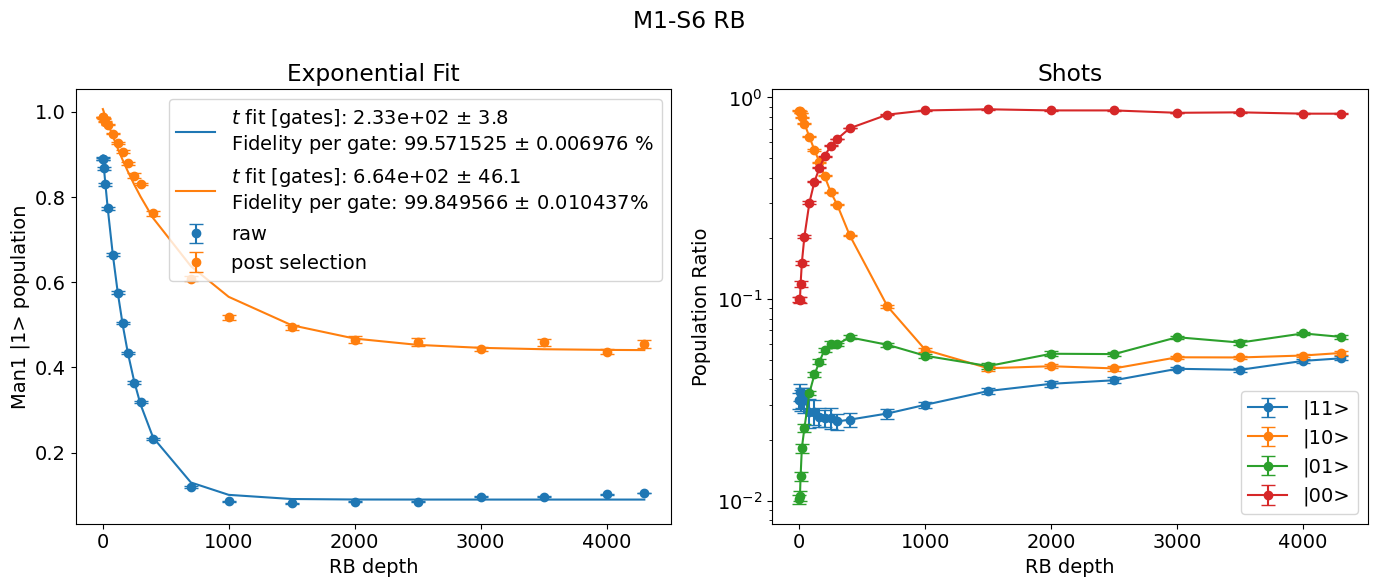

961.028351952544
968.0276446754301
955.027681058263
964.0291384242245
1919.0618470540383
1923.0711715898676
2913.11381606502
2903.123007551115
2913.127063118788
2881.130970055568
4812.234466118228
4789.254186186237
9677.553488615456
9703.56397125773
9707.568237074465
9652.554936434546


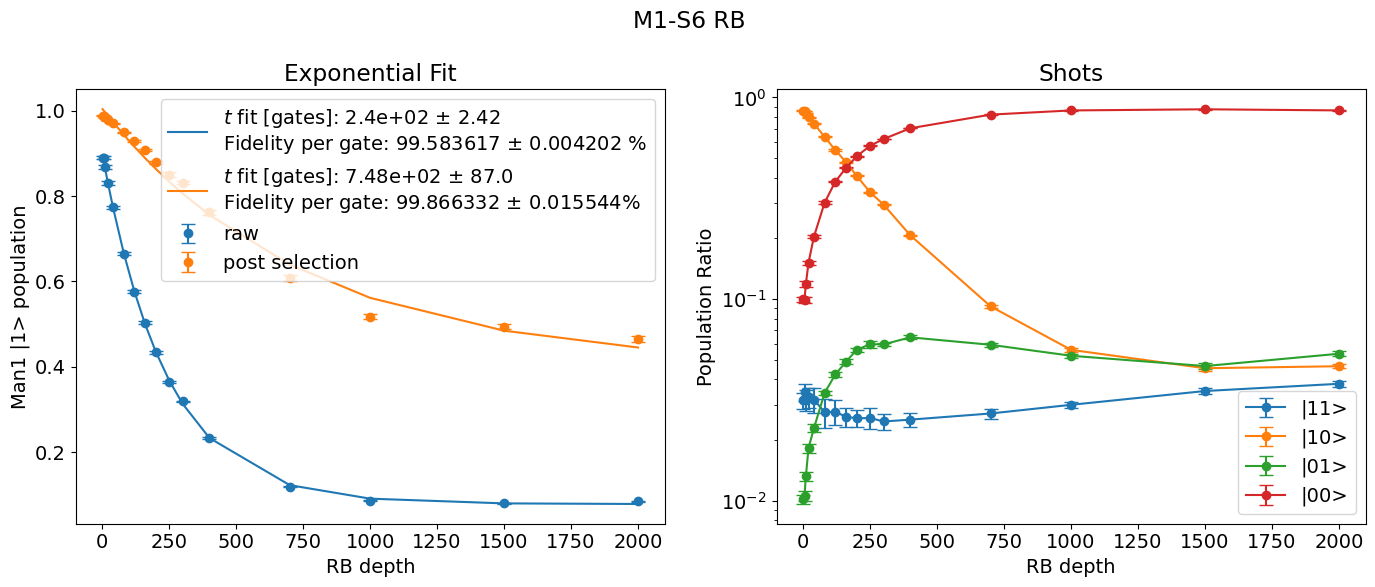

976.0262075790527
984.0271235448599
970.0281575069839
980.031154860726
1950.0656461625974
1948.0713265603522
2943.124582383282
2936.1270161260672
2922.1386093399287
2938.149325216332
4905.256416478726
4898.272961211952
9766.589641488943
9786.604865646303
9808.602608635518
9790.599257021759
9795.600626427507
9817.60599109106
9781.603332510625
9800.605077608789
9797.600043152916


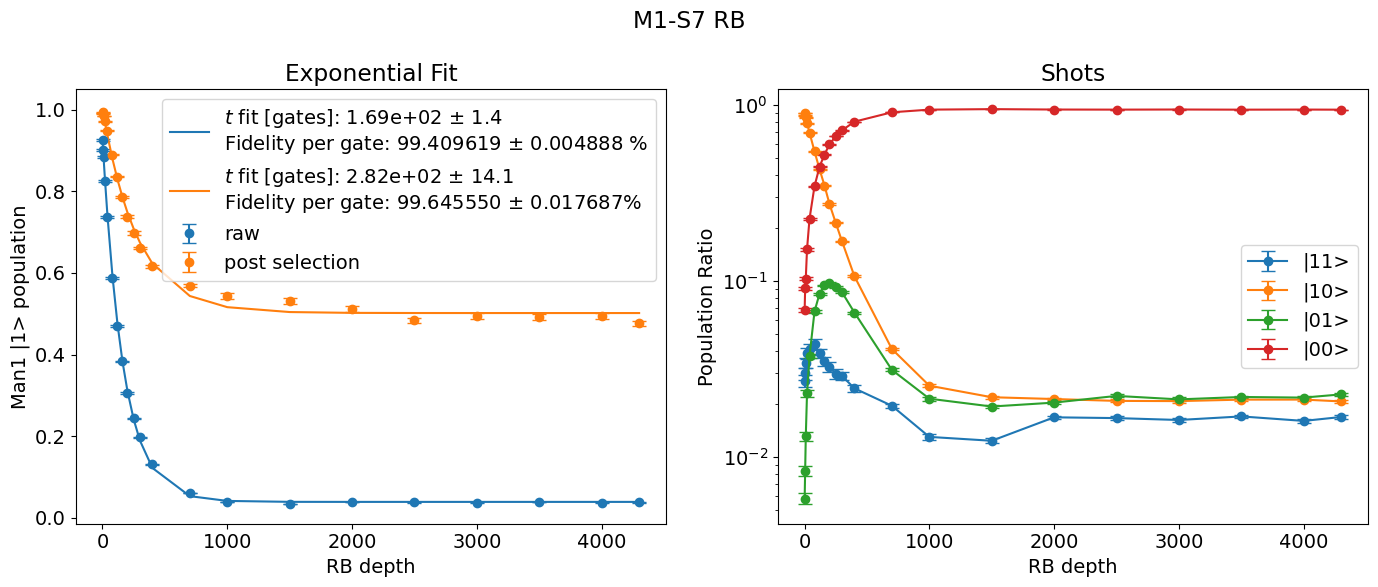

976.0262075790527
984.0271235448599
970.0281575069839
980.031154860726
1950.0656461625974
1948.0713265603522
2943.124582383282
2936.1270161260672
2922.1386093399287
2938.149325216332
4905.256416478726
4898.272961211952
9766.589641488943
9786.604865646303
9808.602608635518
9790.599257021759


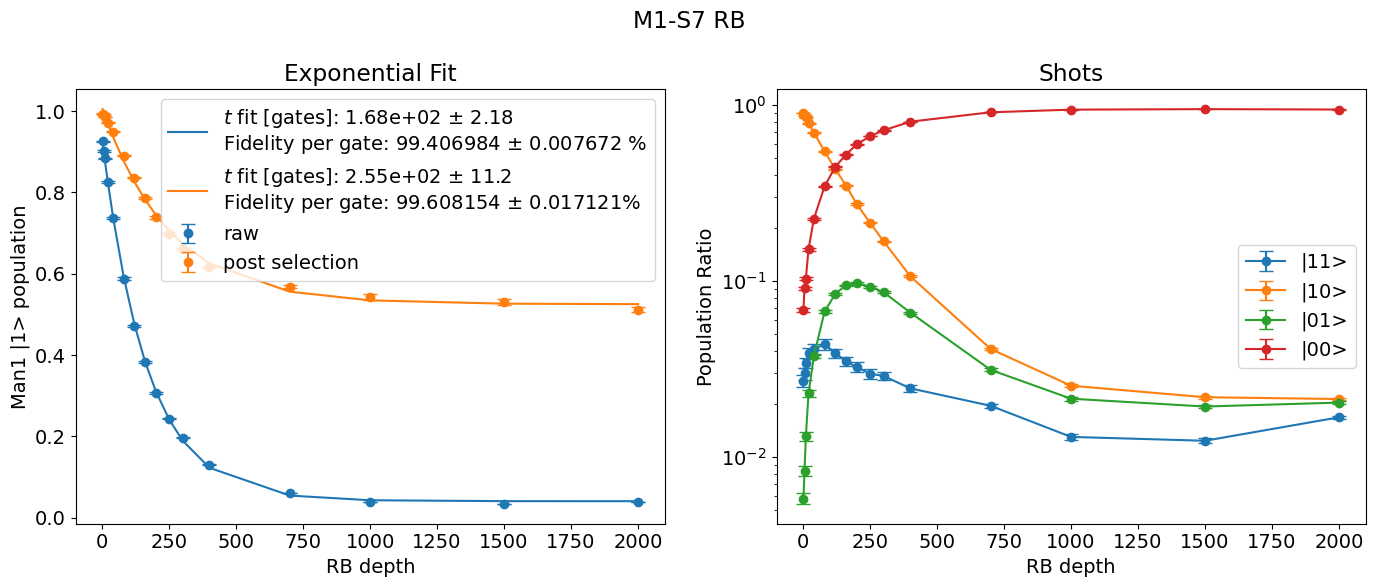

   Mode                                          file_list  \
0     1  [548, 549, 550, 551, 552, 553, 554, 555, 556, ...   
1     2  [569, 570, 571, 572, 573, 574, 575, 576, 577, ...   
2     3  [590, 591, 592, 593, 594, 595, 596, 597, 598, ...   
3     4  [611, 612, 613, 614, 615, 616, 617, 618, 619, ...   
4     5  [632, 633, 634, 635, 636, 637, 638, 639, 640, ...   
5     6  [653, 654, 655, 656, 657, 658, 659, 660, 661, ...   
6     7  [674, 675, 676, 677, 678, 679, 680, 681, 682, ...   

                                                name  \
0  _SingleBeamSplitterRBPostSelection_sweep_depth...   
1  _SingleBeamSplitterRBPostSelection_sweep_depth...   
2  _SingleBeamSplitterRBPostSelection_sweep_depth...   
3  _SingleBeamSplitterRBPostSelection_sweep_depth...   
4  _SingleBeamSplitterRBPostSelection_sweep_depth...   
5  _SingleBeamSplitterRBPostSelection_sweep_depth...   
6  _SingleBeamSplitterRBPostSelection_sweep_depth...   

                                           fids_list  

In [66]:
# Perform fitting only up to depth 2000 and store in dataframe 
end_idx = -5

# Initialize new columns in the DataFrame
df['fids_list'] = None
df['fids_post_list'] = None
df['fid'] = None
df['fid_err'] = None
df['fid_post'] = None
df['fid_post_err'] = None
df['Depth fit up to '] = None
df['depth_list'] = None

# Add new columns to dataframe: fids_list, fids_post_list, fid, fid_err, fid_post, fid_post_err
for idx, row in df.iterrows(): 
    file_list = df['file_list'][idx]#[:-5]  
    return_args = show_rb(prev_data, expt_path, file_list, name='_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title='M1-S' + str(df['Mode'][idx]) + ' RB')
    fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list, fid, fid_err, fid_post, fid_post_err = return_args
    
    # Assign the returned values to the new columns
    df.at[idx, 'depth_list'] = depth_list
    df.at[idx, 'fids_list'] = fids_list
    df.at[idx, 'fids_post_list'] = fids_post_list

    # for these numbers we reduce the range of fitting 
    file_list = file_list[:end_idx]
    return_args = show_rb(prev_data, expt_path, file_list, name='_SingleBeamSplitterRBPostSelection_sweep_depth_defined_storsweep.h5', title='M1-S' + str(df['Mode'][idx]) + ' RB')
    fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, ndepth_list, ebars_list, ebars_post_list, fid, fid_err, fid_post, fid_post_err = return_args
    
    df.at[idx, 'fid'] = fid
    df.at[idx, 'fid_err'] = fid_err
    df.at[idx, 'fid_post'] = fid_post
    df.at[idx, 'fid_post_err'] = fid_post_err
    df.at[idx, 'Depth fit up to '] = depth_list[end_idx -1 ]

# Display the updated DataFrame
print(df)

In [63]:
depth_list

[1, 5, 10, 20, 40, 80, 120, 160, 200, 250, 300, 400, 700, 1000, 1500, 2000]

In [70]:

# Assuming df is your DataFrame and parent_path is defined
folder = os.path.join(parent_path, 'RAM_paper_results', 'datasets')
file_name = 'DualRail_BeamSplitters.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to h:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\DualRail_BeamSplitters.csv


## M2-S1

## M2-S2

## M2-S3

## M2-S4

## M2-S5

## M2-S6

## M2-S7